Necessary imports


In [2]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
# import keras # Keras can be imported as a separate library (and can use different backends)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model, load_model, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Input, Activation, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras import metrics
from tensorflow.keras import losses


import matplotlib.pyplot as plt



batch_size = 128
num_classes = 10
epochs = 20

In [2]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

Importing and preparing the data (simple MNIST dataset)


In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## flatten the data from 2D to 1D (vector)
## the data shape is [28x28]

x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## convert to float [0.0 - 1.0]
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape)

60000 train samples
10000 test samples
(60000,)


Convert class vectors (single label) to One-hot encoding (vector encoding)

In [5]:
## One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

There are two main ways to define model architecture in Keras - Sequential and Functional APIs.

- Sequential API is very easy to understand and can be a great tool for creating linear (sequential) model architectures. 

- Functional API can be used to create more complicated architectures, with multiple inputs and outputs, as well as divergences from linear processing path.



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-tr

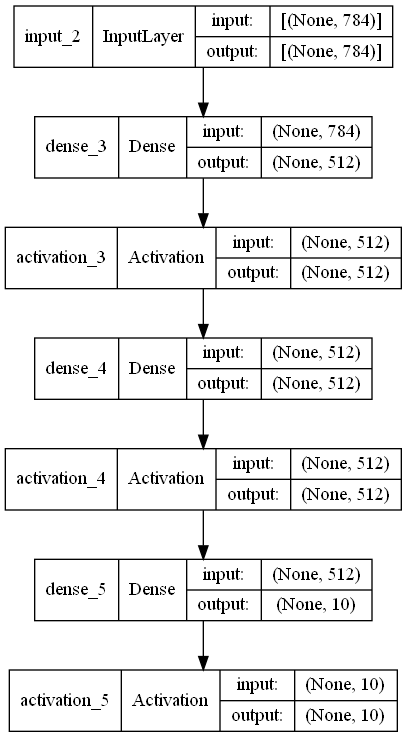

In [7]:
## Prepare model architecture using Sequential API - long version
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(512))
model.add(Activation('relu'))

# model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))

# model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# show model summary
model.summary()
# # visualize the model
dot_img_file = '/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


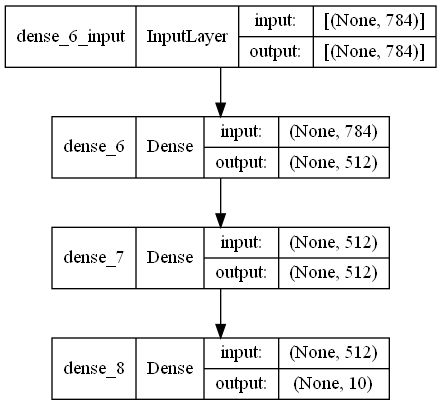

In [8]:
## Prepare model architecture using Sequential API
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


# show model summary
model.summary()
# # visualize the model
dot_img_file = 'model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
 output (Activation)         (None, 10)                0     

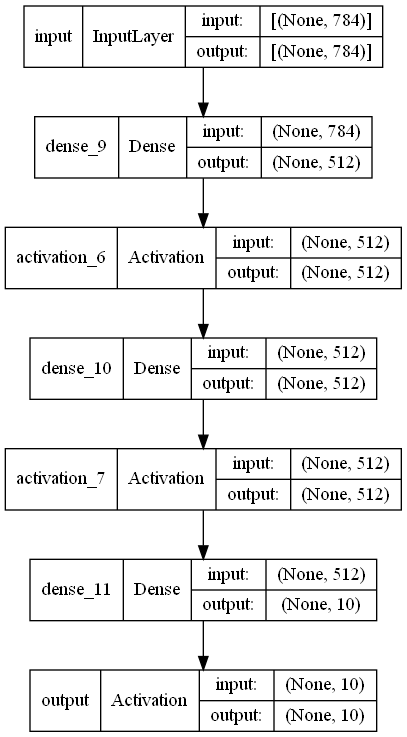

In [9]:
# Prepare model architecture using Functional API - long version

input = Input(shape=(784,), name='input')
x = Dense(512)(input)
x = Activation('relu')(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dense(num_classes)(x)
output = Activation('softmax', name='output')(x)

model = Model(inputs=[input], outputs=[output] )

# show model summary
model.summary()
# # visualize the model
dot_img_file = '/model_f.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 first_dense (Dense)         (None, 512)               401920    
                                                                 
 second_dense (Dense)        (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


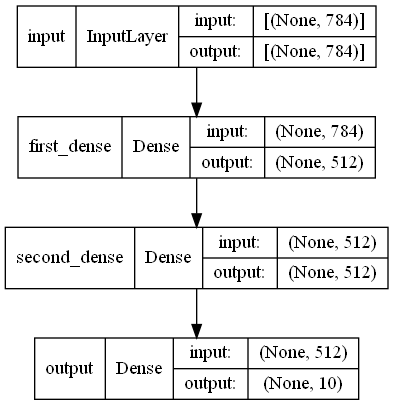

In [10]:
# Prepare model architecture using Functional API - concise

input = Input(shape=(784,), name='input')
x = Dense(512, activation='relu', name='first_dense')(input)
x = Dense(512, activation='relu', name='second_dense')(x)
output = Dense(num_classes, activation='softmax', name='output')(x)

model = Model(inputs=[input], outputs=[output] )


# show model summary
model.summary()
# # visualize the model
dot_img_file = '/model_f_s.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)



In order to use the model it needs to be "compiled" first in Keras. 
Compilation process prepares the model for training - sets the optimizer (backpropagation technique), loss, metrics etc.

In [11]:
# set params using text (good for built-in types)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [12]:
# OR set params using objects (so we can even use custom losses, metrics or optimizers)
model.compile(loss=losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=[metrics.categorical_accuracy])

Choosing the correct optimizer and setting the parameters (simplest of which is Learning Rate) can increase the speed of training step and/or accuracy of the resulting model. For more information please check:

https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

https://keras.io/optimizers/

In [13]:
# Train model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2202 - categorical_accuracy: 0.9328 - val_loss: 0.1318 - val_categorical_accuracy: 0.9591
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0813 - categorical_accuracy: 0.9755 - val_loss: 0.0897 - val_categorical_accuracy: 0.9725
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0547 - categorical_accuracy: 0.9829 - val_loss: 0.0848 - val_categorical_accuracy: 0.9760
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0379 - categorical_accuracy: 0.9883 - val_loss: 0.0728 - val_categorical_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0302 - categorical_accuracy: 0.9907 - val_loss: 0.0814 - val_categorical_accuracy: 0.9789
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0229 - categorical_accuracy: 0.9930 - val_loss: 0.0787 - val_categorical_accuracy: 0.9816
Epoc

In [14]:
# history object stores the history of training as a dictionary

# Available data:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


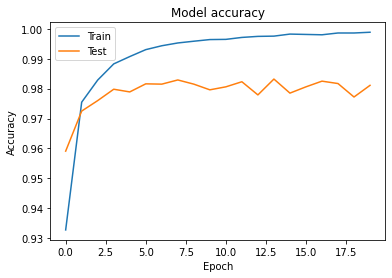

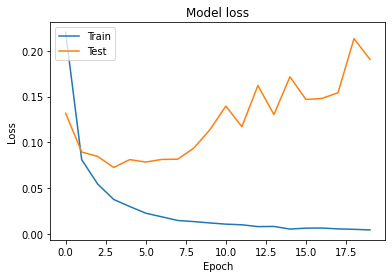

In [15]:
# visualize training history 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Models can be saved to disk, for later use (inference) or for retraining

In [16]:
modelPath = 'savedModel.h5'

model.save(modelPath)
loadedModel = load_model(modelPath)
loadedModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 first_dense (Dense)         (None, 512)               401920    
                                                                 
 second_dense (Dense)        (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The model object remebers it's state for the current session - which means, that it can be "refined" (fine-tuned) by simply performing more iterations

Epoch 21/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0044 - categorical_accuracy: 0.9988 - val_loss: 0.2228 - val_categorical_accuracy: 0.9779
Epoch 22/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0056 - categorical_accuracy: 0.9987 - val_loss: 0.1736 - val_categorical_accuracy: 0.9820
Epoch 23/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0043 - categorical_accuracy: 0.9989 - val_loss: 0.1806 - val_categorical_accuracy: 0.9822
Epoch 24/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0048 - categorical_accuracy: 0.9990 - val_loss: 0.1907 - val_categorical_accuracy: 0.9834
Epoch 25/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0040 - categorical_accuracy: 0.9989 - val_loss: 0.2039 - val_categorical_accuracy: 0.9821
Test loss: 0.203929603099823
Test accuracy: 0.9821000099182129


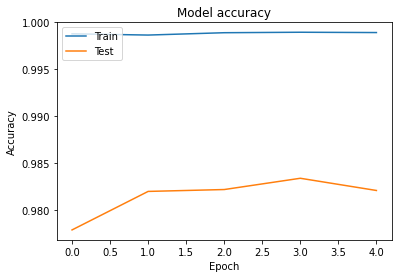

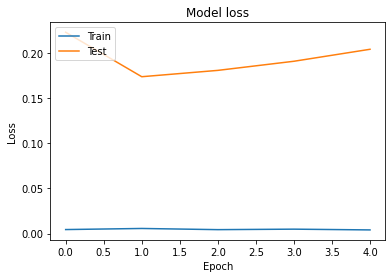

In [17]:
# Refine model
startingEpoch = epochs
epochsToAdd = 5

history = loadedModel.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=(startingEpoch + epochsToAdd), # total epochs
                    verbose=1,
                    validation_data=(x_test, y_test), 
                    initial_epoch = startingEpoch # we start counting at this epoch
                    )

score = loadedModel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

It is also possible to save only weights of the model, or even just the architecture.

This can be very usefull to either store the model, but without the state of the optimizer or to save the architecture as a proof of concept, to then train properly on a different or extended dataset


In [18]:
# saving architecture to JSON file
json_config = model.to_json()
reinitialized_model = keras.models.model_from_json(json_config)

with open("model_architecture.json", "w") as f:
    f.write(json_config)
    
# saving just weights
model.save_weights('model_weights.h5')


# loading architecture and weights
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 first_dense (Dense)         (None, 512)               401920    
                                                                 
 second_dense (Dense)        (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Training can be a long process, so it might be necessary to introduce some restrictions and fail-safes.

If the training is stopped prematurely due to an error, then it is possibe to loose progress. Therefore it is always advisable to use the checkpointing system in Keras

In order to avoid overfitting it is also advisable to terminate the training task earlier than expected, based on some criteria (for example trend of chosen metric)

Both theese tasks can be achieved simultaneously using callbacks

In [19]:
# Early stopping and checkpoint system

checkpoint_path = 'checkpoint-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5'

# patience - how many epochs to wait (max) before the system decides that the 
# trend of measured metric deviated from the desired. For example if monitoring 
# the validation loss and param set to 30 epoch if during these epochs there is no
# overall downward trend, then the training will be stopped

from keras.callbacks import Callback

# https://www.tensorflow.org/guide/keras/custom_callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch} finished')

    def on_train_end(self, logs=None):
        print('Training over!')

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=False, mode='min'),
      CustomCallback()
]

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=[metrics.categorical_accuracy] )

epochs = 100

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=keras_callbacks)




Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0205 - categorical_accuracy: 0.9955 - val_loss: 0.1580 - val_categorical_accuracy: 0.9771
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - categorical_accuracy: 0.9962 - val_loss: 0.1405 - val_categorical_accuracy: 0.9800
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0125 - categorical_accuracy: 0.9965 - val_loss: 0.1461 - val_categorical_accuracy: 0.9768
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0101 - categorical_accuracy: 0.9969 - val_loss: 0.1318 - val_categorical_accuracy: 0.9784
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0120 - categorical_accuracy: 0.9964 - val_loss: 0.1252 - val_categorical_accuracy: 0.9800
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0111 - categorical_accuracy: 0.9967 - val_loss: 0.1644 - val_categorical_accuracy: 0.976

In [ ]:
history.history.keys()

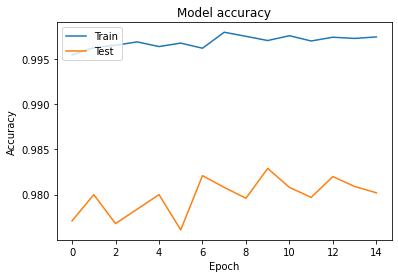

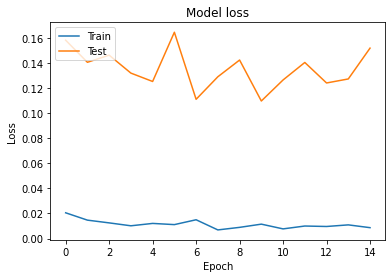

In [20]:
# visualize training history 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TASK 1:
- Implement an MLP network using Keras framework, using the same architecture as in your previous homework (MLP from scratch). Compare the results (train time and accuracy) on your own datasets.
- Perform manual hyperparameter tuning - try to find optimal architecture for each dataset (using Keras), by tuning the number of layers, number of neurons ets. 

In [3]:
from __future__ import annotations
from typing import Callable, Optional, Tuple, Dict
import cupy as cp
import cupyx.scipy.signal as cx_signal
import numpy as np 
import matplotlib.pyplot as plt
import logging
from tqdm.notebook import tqdm
logging.basicConfig(level=logging.INFO)

## Losses

In [4]:
@cp.fuse("cce_helper")
def _fused_cce_helper(y_true, y_pred):
    return y_true * cp.log(y_pred + 1.0e-8)

def categorical_cross_entropy(y_true, y_pred):
    return -cp.sum(_fused_cce_helper(y_true, y_pred), axis=-1)

@cp.fuse("cce_deriv")
def deriv_categorical_cross_entropy(y_true, y_pred):
    return -y_true / (y_pred + 1.0e-8)

@cp.fuse("mse_helper")
def _fused_mse_helper(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mse(y_true, y_pred):
    return cp.mean(_fused_mse_helper(y_true, y_pred), axis=-1)

@cp.fuse("mse_deriv_helper")
def _fused_deriv_mse_helper(y_true, y_pred, N):
    return -2 * (y_true - y_pred) / N

def deriv_mse(y_true, y_pred):
    return _fused_deriv_mse_helper(y_true, y_pred, y_true.shape[0])

## Activations


In [5]:
def softmax(X):
	max_X = cp.max(X, axis=-1, keepdims=True)
	exp_X = cp.exp(X-max_X)
	ret = exp_X / cp.sum(exp_X, axis=-1, keepdims=True)        
	return ret

def deriv_softmax(dX, y):
	if not y.ndim == 2:
		y = y.reshape(1, -1)
	eye = cp.eye(y.shape[-1])
	dX = dX.reshape((*dX.shape, 1))
	einsum = (cp.einsum('ij, jk->ijk', y, eye) - cp.einsum('ij, ik->ijk', y, y))
	
	return cp.matmul(einsum, dX).squeeze(axis=-1)

@cp.fuse("relu_deriv")
def deriv_relu(dX, y):
	return dX * 1.0 * (y > 0.)

@cp.fuse("relu")
def relu(X):
	return X * (X>0.)

@cp.fuse("tanh_foo")
def tanh(X):
	return cp.tanh(X)

@cp.fuse("tanh_deriv")
def deriv_tanh(dX, y):
	return dX * (1.-cp.tanh(y)**2)

@cp.fuse("sigmoid")
def sigmoid(X):
	return 1. / (1. + cp.exp(-X))

@cp.fuse("sigmoid_deriv")
def deriv_sigmoid(dX, y):
	return dX * (y * (1. - y)) 
 

## Other operations

In [6]:
def accuracy_score(y_true, y_pred):
	if y_pred.ndim > 1:
		y_pred = cp.argmax(y_pred, axis=-1)
	if y_true.ndim > 1:
		y_true = cp.argmax(y_true, axis=-1)
	return ((cp.count_nonzero(y_true == y_pred))/y_true.shape[0])

@cp.fuse(kernel_name="generate_weights_uniform")
def generate_weights_uniform(gen, size, _type):
	lower, upper = -(2.0 / cp.sqrt(size[1])), (2.0 / cp.sqrt(size[1]))
	return gen.random(size, dtype=_type) * (upper - lower) + lower

@cp.fuse(kernel_name="generate_weights_normal")
def generate_weights_normal(gen, size, _type):
	scale = (2.0 / cp.sqrt(size[1]))
	return gen.normal(scale=scale, size=size, dtype=_type)

@cp.fuse("update_op")
def update(weights, weight_delta, alpha):
	return weights - weight_delta * alpha 

@cp.fuse("dilate_kernel")
def __compute_dilated_size_on_axis(stride, shape):
	return stride[0] * (shape[0] - 1) + 1, stride[1] * (shape[1] - 1) + 1

def dilate_kernel(x: cp.ndarray, stride=(3,3), fit_to=None):
	s_h, s_w = stride
	m, n = __compute_dilated_size_on_axis(stride, x.shape[1:3]) if not fit_to else fit_to
	out = cp.zeros((x.shape[0], m, n, x.shape[-1]),dtype=x.dtype)
	
	out[:, :s_h*x.shape[1]:s_h,:s_w*x.shape[2]:s_w, :] = x
	return out

def convolve2NN(input_arr: cp.ndarray, kernels: cp.ndarray, padding=(0,0), stride=(1,1), dims=3) -> cp.ndarray:
	assert cp.all(cp.array(padding) >= 0) and cp.all(cp.array(stride) >= 1) and dims <= 3 and dims > 0
	needs_reshape = False
	in_shape = input_arr.shape
	f_shape = kernels.shape
 
	if input_arr.ndim < dims:
		in_shape = in_shape + tuple([1] * (dims - input_arr.ndim))
		needs_reshape = True
	
	if kernels.ndim < dims:
		f_shape = f_shape + tuple([1] * (dims - kernels.ndim))
		needs_reshape = True
  
	if len(in_shape) < 4:
		if len(in_shape) == dims + 1:
			in_shape = in_shape + tuple([1] * (4 - len(in_shape)))
		else:
			in_shape = (1,) + in_shape + tuple([1] * (4 - len(in_shape) - 1))
		needs_reshape = True
  
	if len(f_shape) < 4:
		if len(in_shape) == dims + 1:
			f_shape = f_shape + tuple([1] * (4 - len(f_shape)))
		else:
			f_shape = (1,) + f_shape + tuple([1] * (4 - len(f_shape) - 1))
		needs_reshape = True
  
	if needs_reshape:
		input_arr = input_arr.reshape(in_shape)
		kernels = kernels.reshape(f_shape)
	
	assert in_shape[-1] == f_shape[-1]
	needs_padding = any([pad for  pad in padding if pad > 0])
	needs_dilation = any([_str for _str in stride if _str > 1])
	m = ((in_shape[1] - f_shape[1] + 2*padding[0]) // stride[0]) + 1
	n = ((in_shape[2] - f_shape[2] + 2*padding[1]) // stride[1]) + 1
	f = f_shape[0]
	s = in_shape[0]
	d = in_shape[3]
	if np.any( np.array((s, m, n, f)) < 0): print((s, m, n, f)) 
	out = cp.zeros((s, m, n, f), dtype=cp.float32)
	fit_to_shape = tuple((cp.array(in_shape[1:3]) + 2*cp.array(padding) - cp.array(out.shape[1:3]) + 1).get())
	padded = cp.pad(input_arr, ((0, 0), (padding[0], padding[0]), (padding[1], padding[1]), (0, 0))) if needs_padding else input_arr
	dilated = dilate_kernel(kernels, stride=stride, fit_to=fit_to_shape) if needs_dilation else kernels
 
	for sample in range(s):
		for kernel in range(f):
			for depth in range(d):
				_in, _filter = padded[sample, :, :, depth], dilated[kernel, :, :, depth]			
				out[sample, :, :, kernel] += cx_signal.correlate2d(_in, _filter, "valid")
	return out


def convolve_grad_2NN(in_gradient, layer_kernels, layer_input, w_r_t:str ="input", padding=(0,0), stride=(1,1), dims=3):
	if w_r_t == "kernel": 
		needs_reshape = False
		in_shape = layer_input.shape
		f_shape = in_gradient.shape
		
		if layer_input.ndim < dims:
			in_shape = in_shape + tuple([1] * (dims - layer_input.ndim))
			needs_reshape = True
	
		if in_gradient.ndim < dims:
			f_shape = f_shape + tuple([1] * (dims - in_gradient.ndim))
			needs_reshape = True
  
		if len(in_shape) < 4:
			if len(in_shape) == dims + 1:
				in_shape = in_shape + tuple([1] * (4 - len(in_shape)))
			else:
				in_shape = (1,) + in_shape + tuple([1] * (4 - len(in_shape) - 1))
			needs_reshape = True
	
		if len(f_shape) < 4:
			if len(in_shape) == dims + 1:
				f_shape = f_shape + tuple([1] * (4 - len(f_shape)))
			else:
				f_shape = (1,) + f_shape + tuple([1] * (4 - len(f_shape) - 1))
			needs_reshape = True
	
		if needs_reshape:
			layer_input = layer_input.reshape(in_shape)
			in_gradient = in_gradient.reshape(f_shape)

		   
		out = cp.zeros_like(layer_kernels)

		s = in_shape[0]
		f = f_shape[-1]
		d = in_shape[-1]
  
		fit_to_shape = tuple((cp.array(in_shape[1:3]) + 2*cp.array(padding) - cp.array(out.shape[1:3]) + 1).get())
		padded = cp.pad(layer_input, ((0,0), (padding[0], padding[0]), (padding[1], padding[1]), (0,0)))
		dilated = dilate_kernel(in_gradient, stride, fit_to=fit_to_shape)
  
		for sample in range(s):
			for kernel in range(f):
				for depth in range(d):
					_in = padded[sample, :,:, depth]
					_in_gradient = dilated[sample, :, :, kernel]
					out[kernel, :, :, depth] += cx_signal.correlate2d(_in, _in_gradient, "valid")
		return out

	if w_r_t == "bias":
		return cp.sum(in_gradient, axis = 0, keepdims=True)
	
	if w_r_t == "input":
		needs_reshape = False
		in_shape = layer_kernels.shape
		f_shape = in_gradient.shape
		out_shape = layer_input.shape

		if layer_kernels.ndim < dims:
			in_shape = in_shape + tuple([1] * (dims - layer_kernels.ndim))
			needs_reshape = True

		if in_gradient.ndim < dims:
			f_shape = f_shape + tuple([1] * (dims - in_gradient.ndim))
			needs_reshape = True
   
		
		if len(in_shape) < 4:
			if len(in_shape) == dims + 1:
				in_shape = in_shape + tuple([1] * (4 - len(in_shape)))
			else:
				in_shape = (1,) + in_shape + tuple([1] * (4 - len(in_shape) - 1))
			needs_reshape = True
	
		if len(f_shape) < 4:
			if len(in_shape) == dims + 1:
				f_shape = f_shape + tuple([1] * (4 - len(f_shape)))
			else:
				f_shape = (1,) + f_shape + tuple([1] * (4 - len(f_shape) - 1))
			needs_reshape = True
  
		if needs_reshape:
			layer_kernels = layer_kernels.reshape(in_shape)
			in_gradient = in_gradient.reshape(f_shape)

		out = cp.zeros(out_shape)

		f = in_shape[0]
		d = in_shape[-1]
		s = f_shape[0]
		fit_to_shape = tuple((cp.array(out.shape[1:3]) + 2*cp.array(padding) - cp.array(in_shape[1:3]) + 1).get())
		padded_filters = cp.pad(layer_kernels, ((0,0), (padding[0], padding[0]), (padding[1], padding[1]), (0,0)))
		tup = tuple((cp.array(in_shape[1:3]) - 1).get())
		padded_dilated_gradients = cp.pad(dilate_kernel(in_gradient, stride=stride, fit_to=fit_to_shape ), ((0,0), (tup[0], tup[0]), (tup[1], tup[1]), (0,0)))
  
		for sample in range(s):
			for kernel in range(f):
				for depth in range(d):
					_filter = padded_filters[kernel, :, :, depth]
					_in_gradient = padded_dilated_gradients[sample, :, :, kernel]
					out[sample, :, :, depth] += cx_signal.convolve2d(_filter, _in_gradient, "valid")
		return out

_window_functions: Dict[str, Callable[[cp.ndarray], cp.ndarray]] = {
	"mean": cp.mean,
	"med": cp.median,
	"max": cp.max,
	"min": cp.min
}	
#https://github.com/mritools/cupyimg/blob/d64168280b2b46a7e2aaf8d16f4b6b07d6554f82/cupyimg/skimage/util/shape.py#L11
from cupy.lib.stride_tricks import as_strided

def view_as_windows2NN(arr_in: cp.ndarray, window_shape=(2,2), stride=(1, 1)):
	ndim: int =arr_in.ndim
	shape: Tuple[int] =arr_in.shape
	window_shape = (1, *window_shape, 1)
	stride = (1, *stride, 1)
	if ndim < 4:
		shape = (1,) + shape + tuple([1] * (4 - len(shape)- 1))
		arr_in = cp.reshape(arr_in, shape)

	slices = tuple(slice(None, None, st) for st in stride)
	win_indices_shape = tuple(
		[(s - ws) // st + 1 for s, ws, st in zip(shape, window_shape, stride)]
	)
	new_shape = win_indices_shape + window_shape

	window_strides = arr_in.strides
	indexing_strides = arr_in[slices].strides
	strides = indexing_strides + window_strides

	arr_out = as_strided(arr_in, shape=new_shape, strides=strides)
	return arr_out

from itertools import cycle

def repeat_to_fit_shape2NN(arr_in, shape):
	x, y = shape
	arr_x, arr_y = arr_in.shape[1:3]
	
	assert x >= arr_x and y >= arr_y
	
	times_0 = [1]*arr_x
	times_1 = [1]*arr_y
 
	s_arr_x = sum(times_0)
	s_arr_y = sum(times_1)
	x_cycle = cycle(range(arr_x))
	y_cycle = cycle(range(arr_y))
 
	while s_arr_x < x: 
		idx = next(x_cycle)
		times_0[idx] += 1
		s_arr_x = sum(times_0)
  
	while s_arr_y < y: 
		idy = next(y_cycle)
		times_1[idy] += 1
		s_arr_y = sum(times_1)
	
	return arr_in.repeat(times_0, axis=1).repeat(times_1, axis=2)
	
def pool2NN(input_arr: cp.ndarray, method: str, window_size=(3,3), padding=(0,0), stride=(1,1), dims=3):
	extractor = _window_functions.get(method, None)
 
	if extractor is None: 
		logging.warn("Extractor is not found, max pooling is chosen instead...")
		extractor = _window_functions.get("max")
		method = "max"

	assert cp.all(cp.array(padding) >= 0) and cp.all(cp.array(stride) >= 1) and dims <= 3 and dims > 0
	
	needs_reshape = False
	in_shape = input_arr.shape
 
	if input_arr.ndim < dims:
		in_shape = in_shape + tuple([1] * (dims - input_arr.ndim))
		needs_reshape = True
	
	if len(in_shape) < 4:
		if len(in_shape) == dims + 1:
			in_shape = in_shape + tuple([1] * (4 - len(in_shape)))
		else:
			in_shape = (1,) + in_shape + tuple([1] * (4 - len(in_shape) - 1))
		needs_reshape = True
  
	if needs_reshape:
		input_arr = input_arr.reshape(in_shape) 

	padded = cp.pad(input_arr, ((0,0), (padding[0], padding[0]), (padding[1], padding[1]), (0,0)))
	
	view = view_as_windows2NN(padded, window_size, stride)
	out = extractor(view, axis=tuple(range(padded.ndim, view.ndim)))
 
	if method != 'mean':
		expanded = repeat_to_fit_shape2NN(out, padded.shape[1:3])
		activation_maps = cp.zeros_like(padded)
		activation_maps[expanded == padded] = 1
		activation_maps = activation_maps[:, padding[0]: (-padding[0] if padding[0] else None), padding[1]: (-padding[1] if padding[1] else None) ,:]
	else:
		activation_maps = cp.ones(in_shape, dtype=cp.float32)/cp.prod(cp.array(window_size))
	
	return out, activation_maps

def pool_grad_2NN(in_gradients, method: str, activation_maps, window_size=(3,3), padding=(0,0), stride=(1,1),r=(0, 0)):
	valid = method in _window_functions
	
	if not valid: 
		logging.warn("Extractor is not found, max pooling is chosen instead...")
		method = 'max'
	_, m, n, _ = in_gradients.shape
	
	x = (m  - 1)* stride[0] - 2*padding[0] + window_size[0] + r[0]
	y = (n  - 1)* stride[1] - 2*padding[1] + window_size[1] + r[1]
 
	expanded = repeat_to_fit_shape2NN(in_gradients, (x, y))
	
	out_grad = activation_maps * expanded
	
	return out_grad

def get_dropout_algorithm(dims):
	if dims == 1:
		return _dropout_vector
	if dims == 3:
		return _dropout_3D
	if dims == 2:
		return _dropout_2D

def _dropout_vector(mask, in_arr, samples):
	masks = np.zeros(in_arr.shape)
	_mask = mask.copy()
	for i in range(samples):
		np.random.shuffle(_mask)
		masks[i,:] = (_mask).copy()
	masks = cp.asarray(masks)
	return masks * in_arr, masks

def _dropout_2D(mask, in_arr, samples):
	masks = np.zeros(in_arr.shape)
	_mask = mask.copy()
	for i in range(samples):
		np.random.shuffle(_mask)
		masks[i, :,:] = (_mask).copy()
	masks = cp.asarray(masks)
	return masks * in_arr, masks

def _dropout_3D(mask, in_arr, samples):
	masks = np.zeros(in_arr.shape)
	_mask = mask.copy()
	for i in range(samples):
		np.random.shuffle(_mask)
		masks[i, :, :, :] = (_mask).copy()
	masks = cp.asarray(masks)
	return masks * in_arr, masks

In [7]:
_weights_initializer = {"uniform":generate_weights_uniform, "normal":generate_weights_normal}

In [8]:
class BaseLayer:
	def __init__(self) -> None:
		self._next: BaseLayer = None
		self._prev: BaseLayer = None
		self._dims = (0, 0)
		self._out_dims = (0,0)
		self.__alpha = cp.float32(1.0)
		self.units = 0

	@property
	def alpha(self): return self.__alpha

	def set_alpha(self, alpha):
		self.__alpha = cp.float32(alpha)

	def forward(self, X: cp.ndarray, evaluate=False): return X
	
	def backward(self, Y: cp.ndarray) : return Y
 
	def update(self): 
		self._prev.update() if self._prev is not None else None

	def build(self, **kwargs):
		self.__alpha = kwargs.get('learning_rate', 0.1)
		logging.info(f"Alpha set to {self.__alpha}")
		if self._prev: return self._prev.build(**kwargs)

	@property
	def logits(self):return cp.zeros(self._dims[-1])
	
	def __call__(self, arg: BaseLayer) ->  BaseLayer:
		self._prev = arg
		arg._next = self
		return self

In [9]:
class ActivationLayer(BaseLayer):
	def __init__(self, fn: Callable[[cp.ndarray], cp.ndarray], derivative: Callable[[cp.ndarray, cp.ndarray], cp.ndarray]= None) -> None:
		super().__init__()
		self._next = BaseLayer()
		self._prev = BaseLayer()
		self.__fn = fn
		self.__d_fn = derivative
		self._last_answer = cp.zeros(0, dtype=cp.float32)
		
	def backward(self, grad: cp.ndarray):
		return self._prev.backward(self.__d_fn(grad, self._last_answer))

	@property
	def logits(self): return self.__logits
 
	def __call__(self, arg: BaseLayer) -> BaseLayer:
		self.units = arg.units
		self._dims = (0,) * len(arg._dims)
		self._out_dims = arg._out_dims
		return super().__call__(arg)
	
	def forward(self, X: cp.ndarray, evaluate=False):
		out = self.__fn(X)
		if not evaluate:
			self.__logits = X
			self._last_answer = out
		return self._next.forward(out, evaluate)

In [10]:
class DropoutLayer(BaseLayer):
	def __init__(self, rate: float) -> None:
		assert rate >= 0 and rate <= 1
		self.__rate = rate
		super().__init__()
  
	def __call__(self, arg: BaseLayer) -> BaseLayer:
		self.units = arg.units
		self._dims = (0,) * len(arg._dims)

		self._out_dims = arg._out_dims
		self._mask_dims = (arg._out_dims[1:])
		return super().__call__(arg) 

	def build(self, **kwargs):
		self.__base_mask = np.random.binomial(1, self.__rate, size=self._mask_dims)
		self.__dropout = get_dropout_algorithm(len(self._mask_dims))
		return super().build(**kwargs)
 
	def forward(self, X: cp.ndarray, evaluate=False):
		if evaluate: return self._next.forward(X, evaluate)
		out, self._last_masks = self.__dropout(self.__base_mask, X, X.shape[0])
		
		return self._next.forward(out, evaluate)

	def backward(self, Y: cp.ndarray):
		return self._prev.backward(self._last_masks * Y)
	
	

In [11]:
class SoftmaxLayer(ActivationLayer):
	def __init__(self) -> None:
		super().__init__(softmax, derivative=deriv_softmax)

In [12]:
class ReLULayer(ActivationLayer):
	def __init__(self) -> None:
		super().__init__(relu, derivative=deriv_relu)

In [13]:
class TanHLayer(ActivationLayer):
	def __init__(self) -> None:
		super().__init__(tanh, derivative=deriv_tanh)

In [14]:
class SigmoidLayer(ActivationLayer):
	def __init__(self) -> None:
		super().__init__(sigmoid, derivative=deriv_sigmoid)

In [15]:
class InputLayer(BaseLayer):
	def __init__(self, *dimensions: int) -> None:
		super().__init__()
		self._dims = dimensions
		self._out_dims = (cp.inf, *dimensions)
		self.units = cp.array(dimensions).prod().item()

	def forward(self, X: cp.ndarray, evaluate=False): 
		return self._next.forward(X, evaluate)

	def backward(self, Y: cp.ndarray) : return Y

In [16]:
class FCLayer(BaseLayer):
	def __init__(self, neurons: Optional[int] =None, 
				 bias: Optional[cp.ndarray] =None, 
				 weights: Optional[cp.ndarray] =None, 
				 rng =cp.random.default_rng(2137)) -> None:

		super().__init__()
		self.units = neurons
		self._dims: Tuple = (neurons, 1)
  
		self.gen: cp.random.Generator = rng
  
		self.bias = bias if bias is not None else cp.zeros((1, neurons), dtype=cp.float32)
		self._next = BaseLayer()
		self._prev = BaseLayer()
		self.__last_input: cp.ndarray = cp.zeros(0, dtype=cp.float32)
		self._dL: cp.ndarray = cp.zeros(0, dtype=cp.float32)
		
		if weights is not None:
			if not type(weights) is cp.ndarray:
				weights = cp.array(weights, dtype=cp.float32)
			self._dims = weights.shape
   
		self.__weights = weights
	
	@property
	def W(self): return self.__weights
  
	def build(self, **kwargs):
		initializer_name = kwargs.get("initializer", "uniform")
		initializer = _weights_initializer[initializer_name]
  
		if initializer_name == 'normal':
			if not hasattr(self.gen, 'normal'):
				self.gen.normal = cp.random.normal
   
		self.__weights = cp.vstack((self.bias, initializer(self.gen, self._dims, cp.float32).T))
		logging.info(f"initialized weights of shape: {self.__weights.shape}")
		return super().build(**kwargs)

	def __call__(self, arg: BaseLayer) -> BaseLayer:
		is_not_trainable = isinstance(arg, InputLayer) or isinstance(arg, ActivationLayer) or isinstance(arg, PoolingLayer) or isinstance(arg, FlattenLayer)
  
		if not is_not_trainable and self.W is not None and arg.W is not None:
			assert self._dims[1] == arg._dims[0] 
		else:
			self._dims = (self.units, arg.units)
			self._out_dims = (cp.inf, self.units)
			
		return super().__call__(arg)

	def forward(self, inputs: cp.ndarray, evaluate=False):
		inputs = cp.hstack((cp.ones((len(inputs), 1)), inputs))
		out = cp.matmul(inputs, self.__weights)
		if not evaluate:
			self.__last_input = inputs
			self.__logits = out
		return self._next.forward(out, evaluate)

	@property
	def logits(self): return self.__logits
	
	def update(self):
		dL_dW = cp.matmul(self.__last_input.T, self._dL)
		self.__weights = update(self.__weights, dL_dW, self.alpha)
		return self._prev.update()

	def backward(self, dL):
		self._dL = dL
		dL_dX = cp.matmul(dL, self.__weights[1:].T)
		return self._prev.backward(dL_dX)

In [17]:
import abc

class ModelABC(metaclass=abc.ABCMeta):
	
	@abc.abstractmethod
	def logits(self):...
	@abc.abstractmethod
	def forward(self, X): ...
	@abc.abstractmethod
	def backward(self): ...    
	@abc.abstractmethod
	def update(self):...
	@abc.abstractmethod
	def predict(self, X): ...
	@abc.abstractmethod
	def train(self, X, Y, epochs =10_000, batch_size=32):...

In [18]:
loss_fn = Callable[[cp.ndarray, cp.ndarray], cp.ndarray]

class Loss:
	def __init__(self, cost: loss_fn, cost_derivative: loss_fn):
		self._f = cost
		self._d_f = cost_derivative
		self._model = None
	
	def set_model(self, model: Model): self._model = model
	
	def __call__(self, y_true: cp.ndarray, y_pred: cp.ndarray) -> cp.ndarray: return self._f(y_true, y_pred)
	
	def d(self, y_true: cp.ndarray, y_pred: cp.ndarray) -> cp.ndarray: return self._d_f(y_true, y_pred)

In [19]:
class Conv2dLayer(BaseLayer):

	def __init__(self, units: int, kernel_size: int = (3, 3), stride=(1, 1), padding=(0, 0), rng =cp.random.default_rng(2137)) -> None:
		self._num_of_kernels = units
		self._kernel_dims = kernel_size
		self.gen: cp.random.Generator = rng
		
		self.__bias: cp.ndarray = None
		self.__kernels: cp.ndarray = None
		self.__padding = padding
		self.__stride = stride
		super().__init__()
	
	@property
	def W(self): return self.__kernels
 
	def __call__(self, arg: BaseLayer) -> BaseLayer:
		is_not_trainable = isinstance(arg, InputLayer) or isinstance(arg, ActivationLayer) or isinstance(arg, PoolingLayer) or isinstance(arg, FlattenLayer)
  
		if not is_not_trainable and self.W is not None and arg.W is not None:
			assert self._dims[1] == arg._dims[0] 
		else:
			if len(arg._out_dims) < 4:
				
				dims = arg._out_dims
				arg._out_dims = (1,) + dims[1:3] + (dims[-1],)
			self._in_dims = len(arg._out_dims[1:])
			self._dims = (self._num_of_kernels, *self._kernel_dims, arg._out_dims[-1])
			m = ((arg._out_dims[1] - self._kernel_dims[0] + 2*self.__padding[0]) // self.__stride[0]) + 1
			n = ((arg._out_dims[2] - self._kernel_dims[1] + 2*self.__padding[1]) // self.__stride[1]) + 1
			self._out_dims = (cp.inf, m, n, self._num_of_kernels)
			
		return super().__call__(arg)
 
	def forward(self, X: cp.ndarray, evaluate=False):
		if not evaluate: self._last_input = X
		return self._next.forward(convolve2NN(X, self.__kernels, self.__padding, self.__stride, dims=self._in_dims) + self.__bias, evaluate)

	def backward(self, dL: cp.ndarray):
		self._dL_dF = convolve_grad_2NN(dL, self.__kernels, self._last_input, w_r_t="kernel", padding=self.__padding, stride=self.__stride, dims=self._in_dims)
		self._dL_dB = convolve_grad_2NN(dL, self.__kernels, self._last_input, w_r_t="bias", padding=self.__padding, stride=self.__stride, dims=self._in_dims)
		self._dL_dX = convolve_grad_2NN(dL, self.__kernels, self._last_input, padding=self.__padding, stride=self.__stride, dims=self._in_dims)
		return self._prev.backward(self._dL_dX)

	def update(self):
		self.__bias = update(self.__bias, self._dL_dB, self.alpha)
		self.__kernels = update(self.__kernels, self._dL_dF, self.alpha)
		return self._prev.update()

	def build(self, **kwargs):
		initializer_name = kwargs.get("initializer", "uniform")
		initializer = _weights_initializer[initializer_name]
  
		if initializer_name == 'normal':
			if not hasattr(self.gen, 'normal'):
				self.gen.normal = cp.random.normal
	
		bias_shape = (1, *self._out_dims[1:])
		self.__bias = cp.zeros(bias_shape, cp.float32)
		self.__kernels = initializer(self.gen, self._dims, cp.float32)
	
		return super().build(**kwargs)

In [20]:
class PoolingLayer(BaseLayer):
	def __init__(self, mode="max", stride=None, window_size=(2,2), padding=(0,0)) -> None:
		super().__init__()
  
		if not stride: stride = (*window_size,)
  
		self.__stride = stride
		self.__padding = padding
		self.__window_size = window_size
  
		self.__op = mode
	
	def __call__(self, arg: BaseLayer) -> BaseLayer:
		self._dims = tuple([0] * len(arg._dims))
		m = ((arg._out_dims[1] - self.__window_size[0] + 2*self.__padding[0]) // self.__stride[0]) + 1
		n = ((arg._out_dims[2] - self.__window_size[1] + 2*self.__padding[1]) // self.__stride[1]) + 1
		self.__r = ((arg._out_dims[1] - self.__window_size[0] + 2*self.__padding[0]) % self.__stride[0],
       		(arg._out_dims[2] - self.__window_size[1] + 2*self.__padding[1]) % self.__stride[1])
		self._out_dims = (arg._out_dims[0], m, n, arg._out_dims[-1])
		return super().__call__(arg)	
 
	def forward(self, X: cp.ndarray, evaluate=False):
		pooled, activation = pool2NN(X, self.__op, self.__window_size, self.__padding, self.__stride)
		if not evaluate: self.__activation_maps = activation
		return self._next.forward(pooled, evaluate)

	def backward(self, Y: cp.ndarray):
		return self._prev.backward(pool_grad_2NN(Y, self.__op, self.__activation_maps, self.__window_size, self.__padding, self.__stride, self.__r))

In [21]:
class FlattenLayer(BaseLayer):
	def __init__(self) -> None:
		super().__init__()
  
	def forward(self, X: cp.ndarray, evaluate=False):
		if not evaluate: self.__shape = X.shape
		out = X.reshape(X.shape[0], -1)
		return self._next.forward(out) 

	def __call__(self, arg: BaseLayer) -> BaseLayer:
		self._dims = tuple([0] * len(arg._dims))
  
		self.units = int(cp.array(arg._out_dims[1:]).prod().get())
		self._out_dims = (cp.inf, self.units)
		return super().__call__(arg)
 
	def backward(self, Y: cp.ndarray):
		return self._prev.backward(cp.reshape(Y, self.__shape))

In [22]:
class CrossentropyLoss(Loss):
	def __init__(self):
		super().__init__(categorical_cross_entropy, deriv_categorical_cross_entropy)
  

In [23]:
class MSELoss(Loss):
	def __init__(self):
		super().__init__(mse, deriv_mse)

In [24]:
class History:
	def __init__(self, total_time, time_per_epoch, **history) -> None:
		self.__history = history
		self.__total_time = total_time
		self.__time_per_epoch = time_per_epoch
  
	@property
	def history(self): return dict(**self.__history)
 
	@property
	def total_time(self): return self.__total_time
 
	@property
	def time_per_epoch(self): return self.__time_per_epoch
	

In [25]:
class Network(ModelABC):
	def __init__(self, _input: BaseLayer, _output: BaseLayer, loss_fn: Loss, learning_rate: float, weight_initializer: str=""):
		self.__input_layer = _input
		self.__output_layer = _output
		self.__loss_fn = loss_fn
		self.__loss_fn.set_model(self)
		self.__alpha = learning_rate
		self.__initializer = weight_initializer
		self.y_pred = cp.zeros(self.__output_layer._dims[0])
		
	def build(self): 
		kw = {"initializer":self.__initializer, "learning_rate":self.__alpha}
		return self.__output_layer.build(**kw)
			
	def forward(self, X, evaluate=False): return self.__input_layer.forward(X, evaluate)

	def backward(self, targets): 
		err = self.__loss_fn.d(targets, self.y_pred)
		return self.__output_layer.backward(err)
	
	def logits(self): return self.__output_layer.logits
	
	def update(self): return self.__output_layer.update()

	def predict(self, X): return cp.argmax(self.__input_layer.forward(X, True), axis=-1)

	def __dropout_should_be_enabled(self):
		lay = self.__input_layer
		while lay is not None:
			if type(lay) is DropoutLayer: return False
			lay = lay._next
		return True
 
	def train(self, X, Y, epochs =10_000, batch_size=32, test_batch_size=32, test_X=None, test_Y=None, train=True):
		print(train)
		num_of_batches = X.shape[0]
		losses = cp.zeros(epochs)
		accuracies = cp.zeros(epochs)
		evaluate = test_X is not None and test_Y is not None
		if evaluate:
			eval_losses = cp.zeros(epochs)
			eval_accuracies = cp.zeros(epochs)
   
		batches = [X[starting_idx:starting_idx+min(batch_size, num_of_batches-starting_idx)] for starting_idx in range(0, num_of_batches, batch_size)]
		if evaluate:
			num_of_test_batches = test_X.shape[0]
			test_batches = [test_X[starting_idx:starting_idx+min(test_batch_size, num_of_test_batches-starting_idx)] for starting_idx in range(0, num_of_test_batches, test_batch_size)]
			test_targets = [test_Y[starting_idx:starting_idx+min(test_batch_size, num_of_test_batches-starting_idx)] for starting_idx in range(0, num_of_test_batches, test_batch_size)]
			test_labels = [y.argmax(axis=-1) for y in test_targets]
	
		targets = [Y[starting_idx:starting_idx+min(batch_size, num_of_batches-starting_idx)] for starting_idx in range(0, num_of_batches, batch_size)]
		labels = [y.argmax(axis=-1) for y in targets]
		tmp_size = len(labels)
		if evaluate:
			test_tmp_size = len(test_labels)
		indices = list(range(tmp_size))
		iterable = list(zip(batches, targets, labels, indices))
		if evaluate:
			test_iterable = list(zip(test_batches, test_targets, test_labels, list(range(test_tmp_size))))
   
		loop = tqdm(range(epochs), position=0)

		def __evaluate(num, test_batches):
			
			epoch_losses = cp.zeros(test_tmp_size)
			epoch_accuracies = cp.zeros(test_tmp_size)
			
			for t_x, t_y, t_labels, t_i in test_batches: 
				y_pred = self.forward(t_x, True)
				cost = cp.sum(self.__loss_fn(t_y, y_pred))
				acc = 100 * accuracy_score(t_labels, y_pred)
				epoch_accuracies[t_i] = (acc)
				epoch_losses[t_i] = (cost)
	
			loss = cp.mean(epoch_losses)
			eval_losses[num]=(loss)
			acc = cp.mean(epoch_accuracies)
			eval_accuracies[num] = (acc)
			return acc, loss

		def __step(num, train_batches, test_batches):

			epoch_losses = cp.zeros(tmp_size)
			epoch_accuracies = cp.zeros(tmp_size)
			for x, y, _labels, i in train_batches: 
				
				self.y_pred = self.forward(x)
				if train:
					self.backward(y)
					self.update()

				cost = cp.sum(self.__loss_fn(y, self.y_pred))
				acc = 100 * accuracy_score(_labels, self.y_pred)
				epoch_accuracies[i] = (acc)
				epoch_losses[i] = (cost)
			loss = cp.mean(epoch_losses)
			losses[num]=(loss)
			acc = cp.mean(epoch_accuracies)
			accuracies[num] = (acc)
			if evaluate:
				eval_acc, eval_loss = __evaluate(num, test_batches)
				loop.set_postfix({"Accuracy":f"{acc:.3f}%", "Loss":(loss), "Evaluation accuracy":f"{eval_acc:.3f}%", "Evaluation loss":(eval_loss) })
			else:
				loop.set_postfix(Accuracy=f"{acc:.3f}%", Loss=(loss))
		[__step(_, iterable, test_iterable) for _ in loop]
		elapsed = loop.format_dict['elapsed']
		time_per_epoch = 1 / loop.format_dict['rate']
		if evaluate:
			return History(elapsed, time_per_epoch, loss=losses, accuracy=accuracies, eval_loss=eval_losses, eval_accuracy=eval_accuracies)
		return History(elapsed, time_per_epoch, loss=losses, accuracy=accuracies)

	def summary(self):
		lay = self.__input_layer
		while lay is not None:
			print(f"[Type]: {type(lay)}; [Dims]: {lay._dims}; [Out Dims]: {lay._out_dims}")
			lay = lay._next

## My implementation

In [26]:
rng = cp.random.default_rng(2137)

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## flatten the data from 2D to 1D (vector)
## the data shape is [28x28]

x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## convert to float [0.0 - 1.0]
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape)

60000 train samples
10000 test samples
(60000,)


In [8]:
def one_hot(size, pos):
    zeros = np.zeros(size)
    zeros[pos] = 1.0
    return zeros
y_train = np.array([one_hot(10, y) for y in y_train])
y_test = np.array([one_hot(10, y) for y in y_test])

In [35]:
input_size = len(x_train[0])
output_size = 10
in_layer = InputLayer(input_size)
wrapped = FCLayer(64)(in_layer)
wrapped = ReLULayer()(wrapped)
wrapped = FCLayer(32)(wrapped)
wrapped = ReLULayer()(wrapped)
wrapped = FCLayer(output_size)(wrapped)
out = SoftmaxLayer()(wrapped)
mnist_net = Network(in_layer, out, loss_fn=CrossentropyLoss(), learning_rate=0.001, weight_initializer='normal')
mnist_net.build()

INFO:root:Alpha set to 0.001
INFO:root:initialized weights of shape: (33, 10)
INFO:root:Alpha set to 0.001
INFO:root:Alpha set to 0.001
INFO:root:initialized weights of shape: (65, 32)
INFO:root:Alpha set to 0.001
INFO:root:Alpha set to 0.001
INFO:root:initialized weights of shape: (785, 64)
INFO:root:Alpha set to 0.001
INFO:root:Alpha set to 0.001


In [11]:
test_indices = np.random.choice(np.arange(0, 10000), 1000, replace=False)
train_indices = np.random.choice(np.arange(0, 60000), 10000, replace=False)

True


  0%|          | 0/10 [00:00<?, ?it/s]

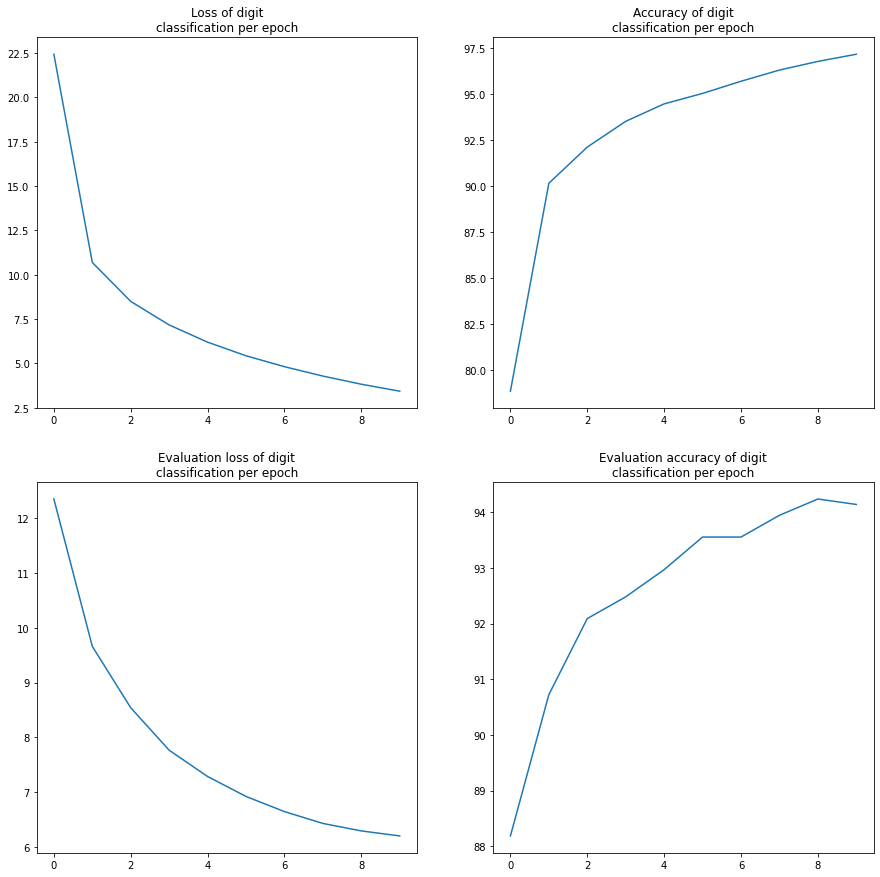

In [36]:

with cp.cuda.Device(0):
	train_history = mnist_net.train(cp.asarray(x_train[train_indices]), cp.asarray(y_train[train_indices]), 10, test_X=cp.asarray(x_test[test_indices]), test_Y=cp.asarray(y_test[test_indices])).history
	_losses = train_history["loss"]
	accuracies = train_history["accuracy"]
	eval_losses = train_history["eval_loss"]
	eval_accuracies = train_history["eval_accuracy"]
	_, axes = plt.subplots(2, 2, figsize=(15,15))
	axes[0, 0].plot(_losses.get())
	axes[0, 0].set_title("Loss of digit\nclassification per epoch")
	axes[0, 1].plot(accuracies.get())
	axes[0, 1].set_title("Accuracy of digit\nclassification per epoch")
 
	axes[1, 0].plot(eval_losses.get())
	axes[1, 0].set_title("Evaluation loss of digit\nclassification per epoch")
	axes[1, 1].plot(eval_accuracies.get())
	axes[1, 1].set_title("Evaluation accuracy of digit\nclassification per epoch")
	plt.show()

## Keras/tensorflow implementation - the same architecture, the same settings/hyperparameters

In [49]:
keras_input = Input((28*28,))
wrapped = Dense(64, kernel_initializer="glorot_normal")(keras_input)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = Dense(32, kernel_initializer="glorot_normal")(wrapped)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = Dense(10, kernel_initializer="glorot_normal")(wrapped)
keras_output = Activation(tf.nn.softmax)(wrapped)

keras_model = Model(inputs=[keras_input], outputs=[keras_output])
keras_model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [51]:
keras_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 activation_15 (Activation)  (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 activation_16 (Activation)  (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
 activation_17 (Activation)  (None, 10)                0   

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2791 - accuracy: 0.1521 - val_loss: 2.2214 - val_accuracy: 0.2180
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 2.1661 - accuracy: 0.2934 - val_loss: 2.1189 - val_accuracy: 0.3480
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 2.0617 - accuracy: 0.3925 - val_loss: 2.0112 - val_accuracy: 0.4320
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.9471 - accuracy: 0.4502 - val_loss: 1.8915 - val_accuracy: 0.4790
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8198 - accuracy: 0.4958 - val_loss: 1.7592 - val_accuracy: 0.5240
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6835 - accuracy: 0.5377 - val_loss: 1.6205 - val_accuracy: 0.5610
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5441 - accuracy: 0.5842 - val_loss: 1.4781 - val_accuracy: 0.6100
Epoch 

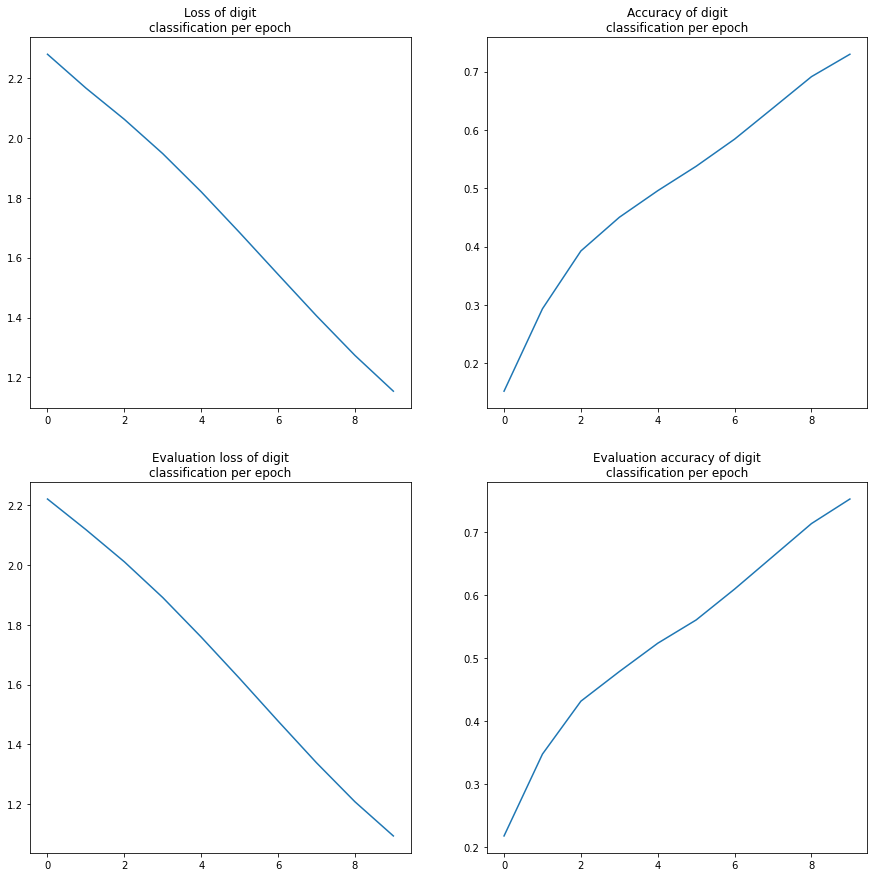

In [52]:
keras_history = keras_model.fit(x_train[train_indices], y_train[train_indices],
                                batch_size=32, validation_batch_size=32, 
                                validation_data=(x_test[test_indices], y_test[test_indices]), 
                                epochs=10).history
_losses = keras_history["loss"]
accuracies = keras_history["accuracy"]
eval_losses = keras_history["val_loss"]
eval_accuracies = keras_history["val_accuracy"]
_, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0, 0].plot(_losses)
axes[0, 0].set_title("Loss of digit\nclassification per epoch")
axes[0, 1].plot(accuracies)
axes[0, 1].set_title("Accuracy of digit\nclassification per epoch")
axes[1, 0].plot(eval_losses)
axes[1, 0].set_title("Evaluation loss of digit\nclassification per epoch")
axes[1, 1].plot(eval_accuracies)
axes[1, 1].set_title("Evaluation accuracy of digit\nclassification per epoch")
plt.show()

#### Tuning of Keras model - firstly, I increased the count of trainable parameters and changed optimizer to Adam, however only the last adjustment was needed to boost accuracy and reduce loss of model - so I will show the results of only that improvement.

In [12]:
keras_input = Input((28*28,))
wrapped = Dense(64, kernel_initializer="glorot_normal")(keras_input)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = Dense(32, kernel_initializer="glorot_normal")(wrapped)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = Dense(10, kernel_initializer="glorot_normal")(wrapped)
keras_output = Activation(tf.nn.softmax)(wrapped)

keras_model_2 = Model(inputs=[keras_input], outputs=[keras_output])
keras_model_2.compile(loss=losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 0.6964 - accuracy: 0.7990 - val_loss: 0.3166 - val_accuracy: 0.9120
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2726 - accuracy: 0.9191 - val_loss: 0.2447 - val_accuracy: 0.9240
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2091 - accuracy: 0.9385 - val_loss: 0.2112 - val_accuracy: 0.9350
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1575 - accuracy: 0.9559 - val_loss: 0.2003 - val_accuracy: 0.9400
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.9602 - val_loss: 0.2085 - val_accuracy: 0.9420
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9701 - val_loss: 0.1773 - val_accuracy: 0.9470
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9760 - val_loss: 0.1787 - val_accuracy: 0.9450
Epoch 

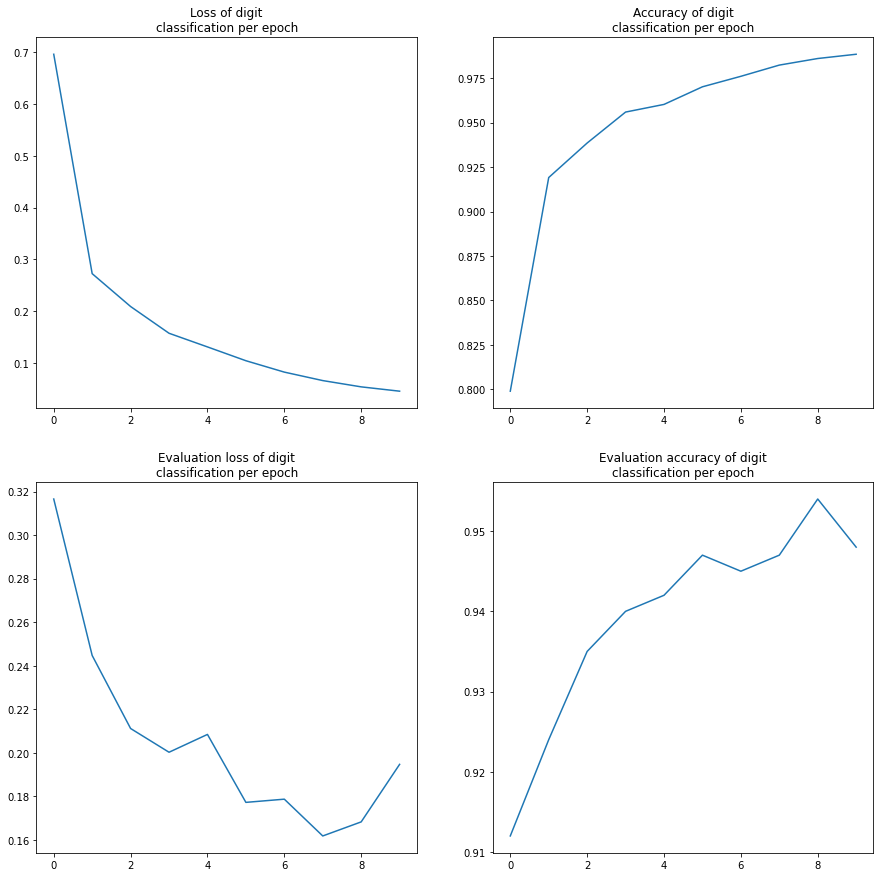

In [13]:
keras_history = keras_model_2.fit(x_train[train_indices], y_train[train_indices],
                                batch_size=32, validation_batch_size=32, 
                                validation_data=(x_test[test_indices], y_test[test_indices]), 
                                epochs=10).history
_losses = keras_history["loss"]
accuracies = keras_history["accuracy"]
eval_losses = keras_history["val_loss"]
eval_accuracies = keras_history["val_accuracy"]
_, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0, 0].plot(_losses)
axes[0, 0].set_title("Loss of digit\nclassification per epoch")
axes[0, 1].plot(accuracies)
axes[0, 1].set_title("Accuracy of digit\nclassification per epoch")
axes[1, 0].plot(eval_losses)
axes[1, 0].set_title("Evaluation loss of digit\nclassification per epoch")
axes[1, 1].plot(eval_accuracies)
axes[1, 1].set_title("Evaluation accuracy of digit\nclassification per epoch")
plt.show()

Convolutional Neural Networks

Creating simple Conv networks in Keras is very similiar to MLP. The main difference is the dimmensionality of input and internal tensors

In [2]:
# reload the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## the data shape is [28x28] - we are changing it to a [28x28x1]

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')




## convert to float [0.0 - 1.0]
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape)

## One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples
(60000, 28, 28, 1)


In [3]:
# Convolutional network using Conv2D layer and Sequential API (long version)


model_in = Input((28, 28, 1))
#wrapped = model_in
wrapped = Conv2D(64, (3,3), input_shape=(28, 28, 1))(model_in)
wrapped = Activation('relu')(wrapped)
wrapped = MaxPooling2D(pool_size=(2,2))(wrapped)
wrapped = Conv2D(64, (3,3))(wrapped)
wrapped = Activation('relu')(wrapped)
wrapped = MaxPooling2D(pool_size=(2,2))(wrapped)
wrapped= Flatten()(wrapped) # we need to resize the data to be able to use Dense layers
wrapped = Dense(64)(wrapped)
wrapped = Dense(10)(wrapped)
model_out = Activation('softmax')(wrapped)
model = Model(inputs=[model_in], outputs=[model_out])
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['categorical_accuracy']) # we can mix text and object based parameters in one compile


model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                             

In [4]:
import tensorflow as tf
import keras as k

In [5]:
print(k.__version__)

2.7.0


In [6]:
print(tf.__version__)

2.7.0


In [7]:
# training and showing history
epochs = 10


# Train model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.1209 - categorical_accuracy: 0.9631 - val_loss: 0.0574 - val_categorical_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0454 - categorical_accuracy: 0.9858 - val_loss: 0.0385 - val_categorical_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0336 - categorical_accuracy: 0.9890 - val_loss: 0.0351 - val_categorical_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - categorical_accuracy: 0.9918 - val_loss: 0.0308 - val_categorical_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0210 - categorical_accuracy: 0.9929 - val_loss: 0.0372 - val_categorical_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0160 - categorical_accuracy: 0.9949 - val_loss: 0.0379 - val_categorical_accuracy

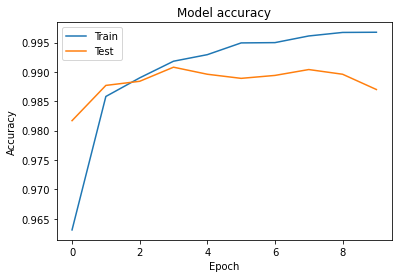

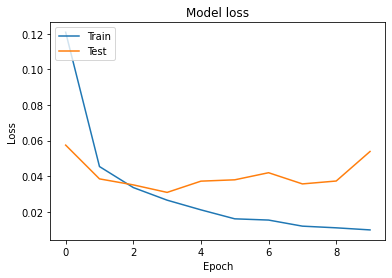

In [8]:
# visualize training history 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Very often, in case of image classification, the main problem is the lack of properly classified training data. However, it is possible to generate additional (artificial) samples using generators

Fake samples will never be as good as real ones (Ground Truth), but in many situations can help (for example, when objects on images are symmetrical simply flipping the images will generate twice the amount of valid samples)

In [65]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import os
import matplotlib.pyplot as plt

# set-up 
batch_size = 32
num_classes = 10
epochs = 10

# Use data augmentation? Default to false 
data_augmentation = True

save_dir = 'saved_models'
model_name = 'keras_cifar10_model.h5'


In [10]:
# CIFAR10 dataset (color images), split between train and test sets:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
# create a more advanced architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['categorical_accuracy'])



In [12]:
if data_augmentation:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
else:
  print('Not using data augmentation')





Using real-time data augmentation.


In [13]:
# Train the model

if data_augmentation:
  # Fit the model on the batches generated by datagen.flow().
  model.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=4)

else:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8533 - categorical_accuracy: 0.3170 - val_loss: 1.5436 - val_categorical_accuracy: 0.4350
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5821 - categorical_accuracy: 0.4231 - val_loss: 1.3727 - val_categorical_accuracy: 0.5047
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4637 - categorical_accuracy: 0.4725 - val_loss: 1.2964 - val_categorical_accuracy: 0.5332
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3757 - categorical_accuracy: 0.5068 - val_loss: 1.2080 - val_categorical_accuracy: 0.5685
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3161 - categorical_accuracy: 0.5315 - val_loss: 1.3507 - val_categorical_accuracy: 0.5354
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2599 - categorical_accuracy: 0.5530 - val_loss: 1.1703 - val_categoric

In [14]:
# Score trained model.

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9980 - categorical_accuracy: 0.6536
Test loss: 0.9980135560035706
Test accuracy: 0.6535999774932861


In [15]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at saved_models\keras_cifar10_model.h5 


Task 2
- Implement a convolutional network for each of your own datasets. Compare the results to your best architecture based on Dense layers (MLP) and Convolutional layers (CNN)
- Integrate generators and callbacks in your training. Investigate the impact of using a generator on accuracy and speed of training on your on custom datasets.

Additional task (extra points)
- Prepare a network with two inputs and single output, that takes two images and predicts if the objects on the images are of the same or different class

## Task 2


In [63]:
import cv2

In [72]:
def generate_random_dataset_with_colour_and_bounding_box(rng: np.random.Generator, 
							num_of_samples: int=3200,
							foreground_size =((16,16)),
							background =np.zeros((32,32)),
							colors =[(255, 0, 0)], color_picks=1, shapes_picks=1):
  
	size_of_frame = background.shape[:2]

	frames: dict[Tuple, np.ndarray] = {}
	
	possible_left_top_coords = [(i, j) for i in range(size_of_frame[0] - foreground_size[0]) for j in range(size_of_frame[1] - foreground_size[1])]
	shapes = ["CIRCLE", "SQUARE", "PLUS"]
	num_samples = min(len(possible_left_top_coords), num_of_samples//color_picks//shapes_picks)
	coords = rng.choice(possible_left_top_coords, size=num_samples, replace=False)
	(w, h) = foreground_size
	radius = min(w, h)//2
	for x, y in coords:
		bounding_box = (x, y, w, h)
		_shapes = rng.choice(shapes, size=shapes_picks, replace=False)
		for shape in _shapes:
			_colors = rng.choice(colors, size=color_picks, replace=False)
			for color in _colors:
				frame = background.copy()
				
				color = tuple([int(c) for c in color])
			  
				if shape == "CIRCLE":
					cv2.circle(frame, (x+radius, y+radius), radius, color, thickness=-1)
					bounding_box = (x, y, 2*radius, 2*radius)
				elif shape == "SQUARE":
					cv2.rectangle(frame, (x, y), (x+w, y+h), color, thickness=-1)
				else:
					frame = cv2.line(frame, (x+w//2, y), (x+w//2, y+h), color, thickness=2)
					cv2.line(frame, (x, y+h//2), (x+w, y+h//2), color, thickness=2)
				frames[(bounding_box, color, shape)] = frame

	return frames

In [73]:
#Get lena image
!wget --no-check-certificate http://www.lenna.org/len_std.jpg -O lena.jpg

--2022-01-26 16:48:05--  http://www.lenna.org/len_std.jpg
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20401 (20K) [image/jpeg]
Saving to: 'lena.jpg'

     0K .......... .........                                  100%  786K=0.03s

2022-01-26 16:48:06 (786 KB/s) - 'lena.jpg' saved [20401/20401]



In [74]:
rng = np.random.default_rng(2137)
input_image=cv2.imread('lena.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
small_lena = cv2.resize(input_image, (32,32), interpolation=cv2.INTER_LANCZOS4)

frames = generate_random_dataset_with_colour_and_bounding_box(rng, background=small_lena, color_picks=4, colors=[(0,0,0),
                                                                                          (0,0,255),
                                                                                          (0,255,255), 
                                                                                          (255, 255, 255), 
                                                                                          (0,255,0), 
                                                                                          (255,0,255), 
                                                                                          (255, 0, 0), 
                                                                                          (255,255,0)], shapes_picks=2)
multi_labels, X = frames.keys(), frames.values()


In [75]:
X = np.array([x/255 for x in X])
print(X.shape)
[plt.imsave(f"lena_{i}.png", X[i]) for i in range(X.shape[0])]
None

(2048, 32, 32, 3)


In [76]:
def encode_color(color, colors):
	vector = np.zeros(len(colors))
	vector[np.argmax(color == colors)] = 1
	return vector

def encode_shape_type(shape, shapes):
	vector = np.zeros(len(shapes))
	vector[np.argmax(shape == shapes)] = 1
	return vector

In [77]:
shapes = ["CIRCLE", "SQUARE", "PLUS"]
colors = np.array([(0,0,0), (0,0,255), (0,255,255), (255, 255, 255), (0,255,0), (255,0,255), (255, 0, 0), (255,255,0)], dtype="d,d,d")
colors_Y = np.array([encode_color(np.array(color, dtype="d,d,d"), colors) for _, color, _ in multi_labels], dtype=np.float32)
shapes_Y = np.array([encode_shape_type(shape, shapes) for _,_,shape in multi_labels], dtype=np.float32)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_X, test_X, train_Y, test_Y = train_test_split(X, shapes_Y, test_size=0.3,train_size= 0.7, stratify=shapes_Y)

## My model - CNN

In [80]:
cp_rng = cp.random.default_rng(2137)

In [81]:
output_size = len(shapes)
in_layer = InputLayer(*X.shape[1:])
wrapped = Conv2dLayer(8, rng=cp_rng, stride=(3,3))(in_layer)
wrapped = ReLULayer()(wrapped)
wrapped = PoolingLayer(mode='med', window_size=(3,3))(wrapped)
wrapped = FlattenLayer()(wrapped)
wrapped = FCLayer(16, rng=cp_rng)(wrapped)
wrapped = FCLayer(3, rng=cp_rng)(wrapped)
out = SoftmaxLayer()(wrapped)
cnet = Network(in_layer, out, loss_fn=CrossentropyLoss(), learning_rate=0.0001, weight_initializer="normal")
cnet.build()

INFO:root:Alpha set to 0.0001
INFO:root:initialized weights of shape: (17, 3)
INFO:root:Alpha set to 0.0001
INFO:root:initialized weights of shape: (73, 16)
INFO:root:Alpha set to 0.0001
INFO:root:Alpha set to 0.0001
INFO:root:Alpha set to 0.0001
INFO:root:Alpha set to 0.0001
INFO:root:Alpha set to 0.0001
INFO:root:Alpha set to 0.0001


In [82]:
cnet.summary()

[Type]: <class '__main__.InputLayer'>; [Dims]: (32, 32, 3); [Out Dims]: (inf, 32, 32, 3)
[Type]: <class '__main__.Conv2dLayer'>; [Dims]: (8, 3, 3, 3); [Out Dims]: (inf, 10, 10, 8)
[Type]: <class '__main__.ReLULayer'>; [Dims]: (0, 0, 0, 0); [Out Dims]: (inf, 10, 10, 8)
[Type]: <class '__main__.PoolingLayer'>; [Dims]: (0, 0, 0, 0); [Out Dims]: (inf, 3, 3, 8)
[Type]: <class '__main__.FlattenLayer'>; [Dims]: (0, 0, 0, 0); [Out Dims]: (inf, 72)
[Type]: <class '__main__.FCLayer'>; [Dims]: (16, 72); [Out Dims]: (inf, 16)
[Type]: <class '__main__.FCLayer'>; [Dims]: (3, 16); [Out Dims]: (inf, 3)
[Type]: <class '__main__.SoftmaxLayer'>; [Dims]: (0, 0); [Out Dims]: (inf, 3)
[Type]: <class '__main__.BaseLayer'>; [Dims]: (0, 0); [Out Dims]: (0, 0)


True


  0%|          | 0/5 [00:00<?, ?it/s]

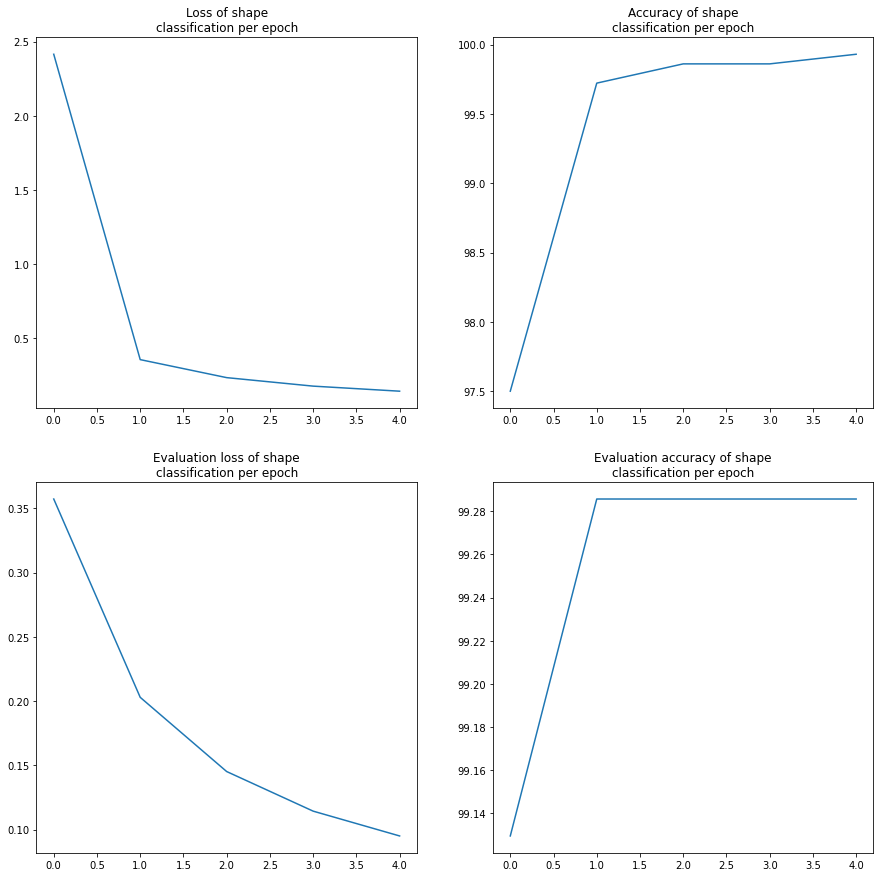

In [83]:
with cp.cuda.Device(0):
	train_history = cnet.train(cp.asarray(train_X), cp.asarray(train_Y), epochs=5, test_X=cp.asarray(test_X), test_Y=cp.asarray(test_Y)).history
	_losses = train_history["loss"]
	accuracies = train_history["accuracy"]
	eval_losses = train_history["eval_loss"]
	eval_accuracies = train_history["eval_accuracy"]
	_, axes = plt.subplots(2, 2, figsize=(15, 15))
	axes[0, 0].plot(_losses.get())
	axes[0, 0].set_title("Loss of shape\nclassification per epoch")
	axes[0, 1].plot(accuracies.get())
	axes[0, 1].set_title("Accuracy of shape\nclassification per epoch")
 
	axes[1, 0].plot(eval_losses.get())
	axes[1, 0].set_title("Evaluation loss of shape\nclassification per epoch")
	axes[1, 1].plot(eval_accuracies.get())
	axes[1, 1].set_title("Evaluation accuracy of shape\nclassification per epoch")
	plt.show()

## My model - MLP

In [84]:
output_size = len(shapes)
in_layer = InputLayer(*X.shape[1:])
wrapped = FlattenLayer()(in_layer)
wrapped = FCLayer(16*16*3)(wrapped)
wrapped = ReLULayer()(wrapped)
wrapped = FCLayer(output_size)(wrapped)
out = SoftmaxLayer()(wrapped)
mlp_net = Network(in_layer, out, loss_fn=CrossentropyLoss(), learning_rate=0.005, weight_initializer='normal')
mlp_net.build()

INFO:root:Alpha set to 0.005
INFO:root:initialized weights of shape: (769, 3)
INFO:root:Alpha set to 0.005
INFO:root:Alpha set to 0.005
INFO:root:initialized weights of shape: (3073, 768)
INFO:root:Alpha set to 0.005
INFO:root:Alpha set to 0.005
INFO:root:Alpha set to 0.005


In [85]:
mlp_net.summary()

[Type]: <class '__main__.InputLayer'>; [Dims]: (32, 32, 3); [Out Dims]: (inf, 32, 32, 3)
[Type]: <class '__main__.FlattenLayer'>; [Dims]: (0, 0, 0); [Out Dims]: (inf, 3072)
[Type]: <class '__main__.FCLayer'>; [Dims]: (768, 3072); [Out Dims]: (inf, 768)
[Type]: <class '__main__.ReLULayer'>; [Dims]: (0, 0); [Out Dims]: (inf, 768)
[Type]: <class '__main__.FCLayer'>; [Dims]: (3, 768); [Out Dims]: (inf, 3)
[Type]: <class '__main__.SoftmaxLayer'>; [Dims]: (0, 0); [Out Dims]: (inf, 3)
[Type]: <class '__main__.BaseLayer'>; [Dims]: (0, 0); [Out Dims]: (0, 0)


True


  0%|          | 0/5 [00:00<?, ?it/s]

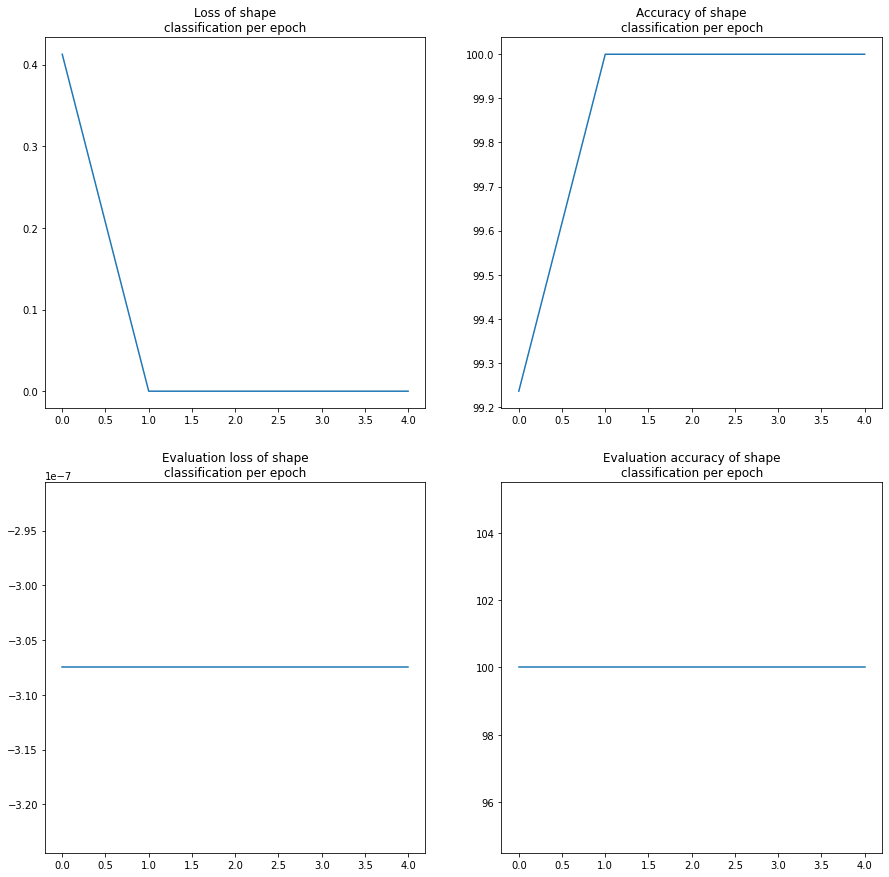

In [86]:
with cp.cuda.Device(0):
	train_history = mlp_net.train(cp.asarray(train_X), cp.asarray(train_Y), epochs=5, test_X=cp.asarray(test_X), test_Y=cp.asarray(test_Y)).history
	_losses = train_history["loss"]
	accuracies = train_history["accuracy"]
	eval_losses = train_history["eval_loss"]
	eval_accuracies = train_history["eval_accuracy"]
	_, axes = plt.subplots(2, 2, figsize=(15, 15))
	axes[0, 0].plot(_losses.get())
	axes[0, 0].set_title("Loss of shape\nclassification per epoch")
	axes[0, 1].plot(accuracies.get())
	axes[0, 1].set_title("Accuracy of shape\nclassification per epoch")
 
	axes[1, 0].plot(eval_losses.get())
	axes[1, 0].set_title("Evaluation loss of shape\nclassification per epoch")
	axes[1, 1].plot(eval_accuracies.get())
	axes[1, 1].set_title("Evaluation accuracy of shape\nclassification per epoch")
	plt.show()

In [87]:
in_layer = Input(X.shape[1:])
wrapped = Conv2D(32,(3,3), strides=(3,3))(in_layer)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = MaxPooling2D((3,3))(wrapped)
wrapped = Flatten()(wrapped)
wrapped = Dense(16)(wrapped)
wrapped = Dense(3)(wrapped)
out = Activation(tf.nn.softmax)(wrapped)

k_net = Model(inputs=[in_layer], outputs=[out])
k_net.compile(optimizer=Adam(), loss=losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [88]:
k_net.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                4624      
                                                           

Epoch 1/5
45/45 [==============================] - 1s 8ms/step - loss: 0.1638 - accuracy: 0.9379 - val_loss: 3.4836e-04 - val_accuracy: 1.0000
Epoch 2/5
45/45 [==============================] - 0s 6ms/step - loss: 2.3313e-04 - accuracy: 1.0000 - val_loss: 1.8467e-04 - val_accuracy: 1.0000
Epoch 3/5
45/45 [==============================] - 0s 6ms/step - loss: 1.5591e-04 - accuracy: 1.0000 - val_loss: 1.3237e-04 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 0s 5ms/step - loss: 1.0752e-04 - accuracy: 1.0000 - val_loss: 8.7533e-05 - val_accuracy: 1.0000
Epoch 5/5
45/45 [==============================] - 0s 6ms/step - loss: 7.0061e-05 - accuracy: 1.0000 - val_loss: 5.6573e-05 - val_accuracy: 1.0000


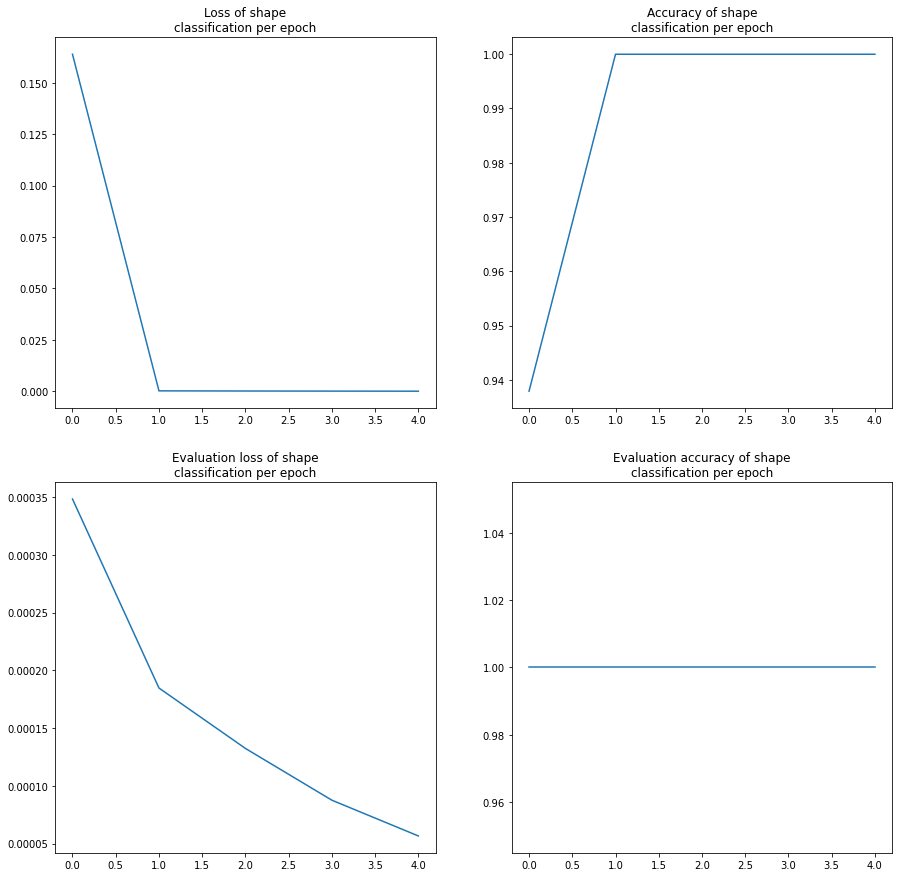

In [89]:
history = k_net.fit(train_X, train_Y, epochs=5, batch_size=32, validation_batch_size=32, validation_data=(test_X, test_Y)).history
_losses = history["loss"]
accuracies = history["accuracy"]
eval_losses = history["val_loss"]
eval_accuracies = history["val_accuracy"]
_, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0, 0].plot(_losses)
axes[0, 0].set_title("Loss of shape\nclassification per epoch")
axes[0, 1].plot(accuracies)
axes[0, 1].set_title("Accuracy of shape\nclassification per epoch")
axes[1, 0].plot(eval_losses)
axes[1, 0].set_title("Evaluation loss of shape\nclassification per epoch")
axes[1, 1].plot(eval_accuracies)
axes[1, 1].set_title("Evaluation accuracy of shape\nclassification per epoch")
plt.show()

## Data augmentation

In [106]:
from tensorflow.python.keras.layers.preprocessing.image_preprocessing import RandomContrast, RandomFlip, RandomTranslation, RandomZoom, RandomRotation 
from tensorflow.python.keras.layers.noise import GaussianNoise
from tensorflow.keras.layers import Lambda
from tensorflow.python.keras.layers.preprocessing.normalization import Normalization
from functools import partial

In [137]:
def augment_input(input_image: tf.Tensor, seed:int=2137) -> tf.Tensor:
    wrapped = GaussianNoise(3)(input_image)
    zoom, rotate, translate = RandomZoom((-0.3,0.3), (-0.3, 0.3), seed=seed), RandomRotation((-0.3, 0.3), seed=seed), RandomTranslation((-0.08, 0.08), (-0.08, 0.08), seed=seed)
    wrapped = Lambda(partial(lambda augmentator, image: augmentator(image), zoom))(wrapped)
    wrapped = RandomContrast((0.1, 0.9), seed=seed)(wrapped)
    wrapped = RandomFlip(mode="horizontal", seed=seed)(wrapped)
    wrapped = RandomFlip(mode="vertical", seed=seed)(wrapped)
    wrapped = Lambda(partial(lambda augmentator, image: augmentator(image), rotate))(wrapped)
    wrapped = Lambda(partial(lambda augmentator, image: augmentator(image), translate))(wrapped)
    wrapped = Normalization(axis=tuple(range(1, len(input_image.shape))))(wrapped)
    wrapped = Lambda(lambda image: 1+(image - tf.reduce_max(image))/(tf.reduce_max(image) - tf.reduce_min(image)))(wrapped)
    return wrapped

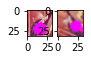

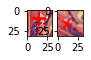

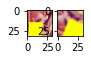

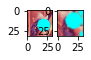

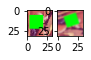

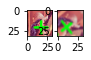

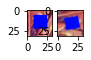

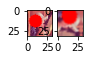

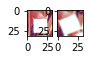

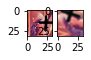

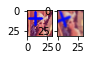

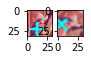

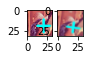

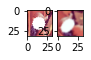

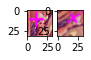

In [149]:
in_layer = Input(X.shape[1:])
wrapped = augment_input(in_layer)
data_augmentator=Model(inputs=[in_layer], outputs=[wrapped])
data_augmentator.compile()

for im in train_X[: : 100]:
	_, axes = plt.subplots(1, 2, figsize=(1, 0.5))
	axes[0].imshow(im)
	new_im = data_augmentator(np.asarray([im]))[0]
	axes[1].imshow(new_im)
	plt.show()
 
train_X_cycle = cycle(range(train_X.shape[0]))
augmented_X = []
augmented_Y = []
for i in range(10000):
    idx = next(train_X_cycle)
    new_x = data_augmentator(np.asarray([train_X[idx]]))[0]
    augmented_X.append(new_x)
    augmented_Y.append(train_Y[idx])
                       
augmented_X = np.asarray(augmented_X)
augmented_Y = np.asarray(augmented_Y)

In [146]:
in_layer = Input(X.shape[1:])
wrapped = augment_input(in_layer)
wrapped = Dropout(0.4)(wrapped)
wrapped = Conv2D(32,(3,3), strides=(3,3))(wrapped)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = MaxPooling2D((3,3))(wrapped)
wrapped = Flatten()(wrapped)
wrapped = Dense(16)(wrapped)
wrapped = Dense(3)(wrapped)
out = Activation(tf.nn.softmax)(wrapped)

aug_k_net = Model(inputs=[in_layer], outputs=[out])
aug_k_net.compile(optimizer=Adam(), loss=losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [147]:
aug_k_net.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 lambda_115 (Lambda)         (None, 32, 32, 3)         0         
                                                                 
 tf.image.adjust_contrast_36  (None, 32, 32, 3)        0         
  (TFOpLambda)                                                   
                                                                 
 tf.image.stateless_random_f  (None, 32, 32, 3)        0         
 lip_left_right_36 (TFOpLamb                                     
 da)                                                             
                                                                 
 tf.image.stateless_random_f  (None, 32, 32, 3)        0         
 lip_up_down_36 (TFOpLambda)                              

Epoch 1/5
45/45 [==============================] - 2s 20ms/step - loss: 0.0899 - accuracy: 0.9637 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 2/5
45/45 [==============================] - 1s 12ms/step - loss: 1.9982e-04 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 3/5
45/45 [==============================] - 1s 12ms/step - loss: 1.6318e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 1s 12ms/step - loss: 1.5119e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 5/5
45/45 [==============================] - 1s 12ms/step - loss: 1.2185e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000


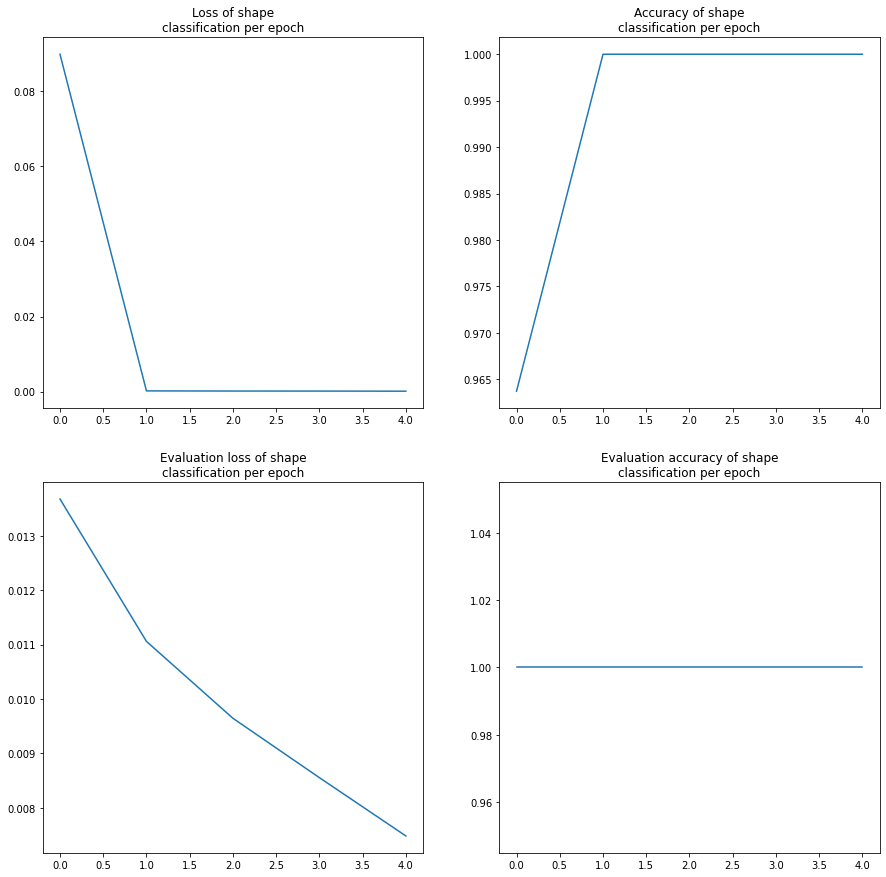

In [148]:
history = aug_k_net.fit(train_X, train_Y, epochs=5, batch_size=32, validation_batch_size=32, validation_data=(test_X, test_Y)).history
_losses = history["loss"]
accuracies = history["accuracy"]
eval_losses = history["val_loss"]
eval_accuracies = history["val_accuracy"]
_, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0, 0].plot(_losses)
axes[0, 0].set_title("Loss of shape\nclassification per epoch")
axes[0, 1].plot(accuracies)
axes[0, 1].set_title("Accuracy of shape\nclassification per epoch")
axes[1, 0].plot(eval_losses)
axes[1, 0].set_title("Evaluation loss of shape\nclassification per epoch")
axes[1, 1].plot(eval_accuracies)
axes[1, 1].set_title("Evaluation accuracy of shape\nclassification per epoch")
plt.show()

## The second way to augment the data

In [152]:
in_layer = Input(X.shape[1:])
wrapped = (in_layer)
wrapped = Conv2D(32,(3,3), strides=(3,3))(wrapped)
wrapped = Activation(tf.nn.relu)(wrapped)
wrapped = MaxPooling2D((3,3))(wrapped)
wrapped = Flatten()(wrapped)
wrapped = Dense(16)(wrapped)
wrapped = Dense(3)(wrapped)
out = Activation(tf.nn.softmax)(wrapped)

aug_k_net_2 = Model(inputs=[in_layer], outputs=[out])
aug_k_net_2.compile(optimizer=Adam(), loss=losses.CategoricalCrossentropy(), metrics=["accuracy"])
aug_k_net_2.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 32)        896       
                                                                 
 activation_26 (Activation)  (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 288)               0         
                                                                 
 dense_26 (Dense)            (None, 16)                4624      
                                                          

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0178 - accuracy: 0.9951 - val_loss: 2.6811e-06 - val_accuracy: 1.0000
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7051e-06 - accuracy: 1.0000 - val_loss: 4.8226e-07 - val_accuracy: 1.0000
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 5.0134e-07 - accuracy: 1.0000 - val_loss: 1.7387e-07 - val_accuracy: 1.0000
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 2.3557e-07 - accuracy: 1.0000 - val_loss: 8.3156e-08 - val_accuracy: 1.0000
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.3355e-07 - accuracy: 1.0000 - val_loss: 4.4195e-08 - val_accuracy: 1.0000


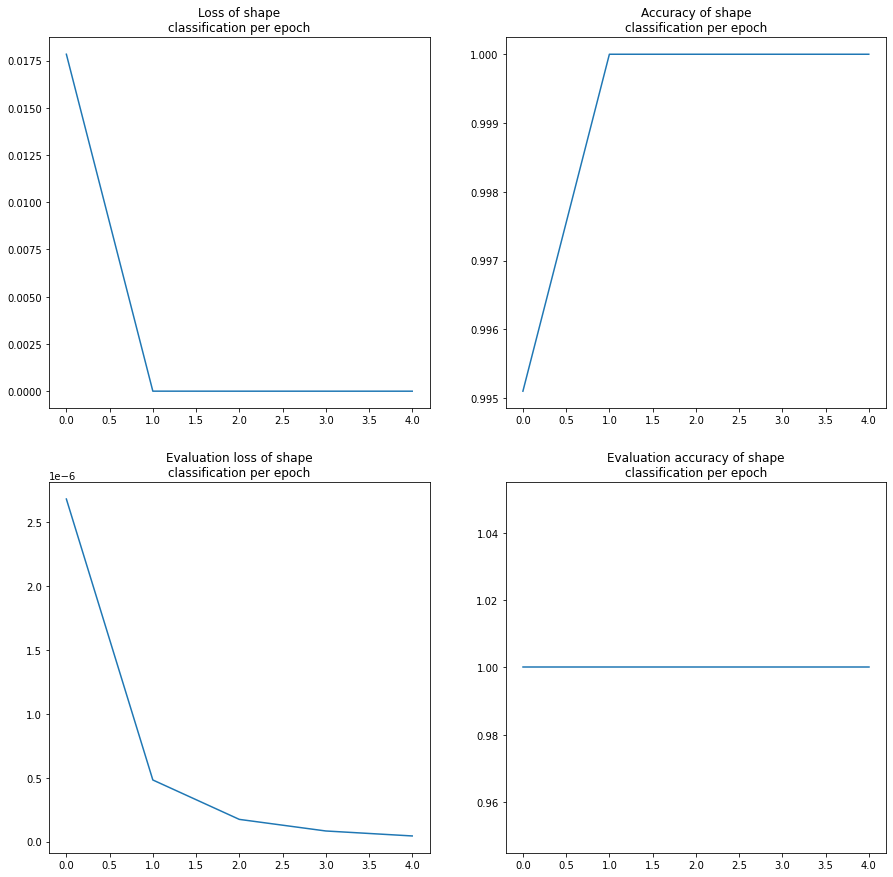

In [155]:
history = aug_k_net_2.fit(augmented_X, augmented_Y, epochs=5, batch_size=32, validation_batch_size=32, validation_data=(test_X, test_Y)).history
_losses = history["loss"]
accuracies = history["accuracy"]
eval_losses = history["val_loss"]
eval_accuracies = history["val_accuracy"]
_, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0, 0].plot(_losses)
axes[0, 0].set_title("Loss of shape\nclassification per epoch")
axes[0, 1].plot(accuracies)
axes[0, 1].set_title("Accuracy of shape\nclassification per epoch")
axes[1, 0].plot(eval_losses)
axes[1, 0].set_title("Evaluation loss of shape\nclassification per epoch")
axes[1, 1].plot(eval_accuracies)
axes[1, 1].set_title("Evaluation accuracy of shape\nclassification per epoch")
plt.show()

### Additional task

In [75]:
first_image = Input((32,32,3), name="first")
second_image = Input((32,32,3), name="second")

def make_mnist_extractor(_input: tf.Tensor) -> tf.Tensor:
	wrapped = Dropout(0.2)(_input)
	wrapped = Conv2D(8, (3,3))(wrapped)
	wrapped = Activation('relu')(wrapped)
	wrapped = MaxPooling2D(pool_size=(2,2))(wrapped)
	wrapped = Conv2D(16, (3,3), strides=(2,2))(wrapped)
	wrapped = Activation('relu')(wrapped)
	wrapped = MaxPooling2D(pool_size=(3,3))(wrapped)
	wrapped= Flatten()(wrapped)
	wrapped= Dropout(0.45)(wrapped)
	# wrapped = Dense(128)(wrapped)
	# wrapped = Activation('relu')(wrapped)
	
	return wrapped

wrapped = Concatenate()([make_mnist_extractor(first_image), make_mnist_extractor(second_image)])
wrapped = Dense(64)(wrapped)
wrapped = Activation('relu')(wrapped)
wrapped = Dense(1)(wrapped)
output = Activation("linear")(wrapped)

conc_model = Model(inputs=[first_image, second_image], outputs=[output])

conc_model.compile(optimizer=Adam(learning_rate=0.01), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [76]:
conc_model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 second (InputLayer)            [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 dropout_32 (Dropout)           (None, 32, 32, 3)    0           ['first[0][0]']                  
                                                                                                  
 dropout_34 (Dropout)           (None, 32, 32, 3)    0           ['second[0][0]']                 
                                                                                           

In [77]:
import numpy as np
# reload the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## the data shape is [28x28] - we are changing it to a [28x28x1]

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


## convert to float [0.0 - 1.0]
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape)

## One-hot encoding
def one_hot(size, pos):
    zeros = np.zeros(size)
    zeros[pos] = 1.0
    return zeros
y_train = np.array([one_hot(10, y) for y in y_train], dtype=np.uint8)
y_test = np.array([one_hot(10, y) for y in y_test], dtype=np.uint8)

train_indices = np.random.choice(list(range(len(x_train))), size=(30000, 2), replace=True)
test_indices = np.random.choice(list(range(len(x_test))), size=(5000, 2), replace=False)

d_x_train = np.asarray([(x_train[idx[0]], x_train[idx[1]]) for idx in train_indices])
d_x_test = np.asarray([(x_test[idx[0]], x_test[idx[1]]) for idx in test_indices])
d_y_train = np.asarray([np.bitwise_and(y_train[idx[0]], y_train[idx[1]]).sum(axis=-1) for idx in train_indices])
d_y_test = np.asarray([np.bitwise_and(y_test[idx[0]], y_test[idx[1]]).sum(axis=-1) for idx in test_indices])
print(d_x_train.shape, d_y_train.shape)
d_x_train[:, 0,:,:, :].shape

50000 train samples
10000 test samples
(50000, 32, 32, 3)
(30000, 2, 32, 32, 3) (30000,)


(30000, 32, 32, 3)

In [78]:
conc_model.fit({"first":d_x_train[:, 0,: ,:, :], "second":d_x_train[:, 1,: ,:, :]}, d_y_train, 
               validation_data=({"first":d_x_test[:, 0,: ,:, :], "second": d_x_test[:, 1,: ,:, :]}, d_y_test), epochs=10)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 1.5611 - accuracy: 0.8986 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 1.5615 - accuracy: 0.8988 - val_loss: 1.5610 - val_accuracy: 0.8988
Epoch 

# Hyperparameter tuning - automatic search using tools

In [16]:
%pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import keras_tuner as kt

# Download and prepare the dataset - Fashion MNIST
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [84]:
# Define the model
# The model builder function returns a compiled model and uses hyperparameters you define inline to hypertune the model

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=16, max_value=256, step=16)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-3,1e-3, 5e-4, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [85]:
# Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn. In this tutorial, you use the Hyperband tuner.
# To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs).

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_keras_tuning')

In [86]:
# You can print a summary of the search space:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.001, 0.0005, 0.0001], 'ordered': True}


In [87]:
# Create a callback to stop training early after reaching a certain value for the validation loss.

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [88]:
# Run the hyperparameter search. The arguments for the search method are the same as those used for tf.keras.model.fit in addition to the callback above.

tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 47s]
val_accuracy: 0.8702499866485596

Best val_accuracy So Far: 0.8854166865348816
Total elapsed time: 00h 09m 45s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 208 and the optimal learning rate for the optimizer
is 0.001.



In [89]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5073 - accuracy: 0.8219 - val_loss: 0.4062 - val_accuracy: 0.8500
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3781 - accuracy: 0.8627 - val_loss: 0.3924 - val_accuracy: 0.8580
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3343 - accuracy: 0.8773 - val_loss: 0.3627 - val_accuracy: 0.8692
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3107 - accuracy: 0.8864 - val_loss: 0.3560 - val_accuracy: 0.8699
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2908 - accuracy: 0.8930 - val_loss: 0.3307 - val_accuracy: 0.8804
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2775 - accuracy: 0.8971 - val_loss: 0.3308 - val_accuracy: 0.8805
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2619 - accuracy: 0.9024 - val_loss: 0.3394 - val_accuracy:

In [90]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5067 - accuracy: 0.8222 - val_loss: 0.4104 - val_accuracy: 0.8548
Epoch 2/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8631 - val_loss: 0.3780 - val_accuracy: 0.8662
Epoch 3/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3363 - accuracy: 0.8768 - val_loss: 0.3478 - val_accuracy: 0.8754
Epoch 4/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3125 - accuracy: 0.8859 - val_loss: 0.3373 - val_accuracy: 0.8763
Epoch 5/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8930 - val_loss: 0.3454 - val_accuracy: 0.8732
Epoch 6/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2764 - accuracy: 0.8965 - val_loss: 0.3113 - val_accuracy: 0.8878
Epoch 7/12
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2631 - accuracy: 0.9024 - val_loss: 0.3171 - val_accuracy:

In [91]:
# Finally evaluate the hypermodel on the test data.

eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8764
[test loss, test accuracy]: [0.35172995924949646, 0.8763999938964844]
